In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


The program loads training and validation data from two Excel files, THA2train.xlsx and THA2validate.xlsx. From these datasets, it extracts features (train_X and validate_X) and labels (train_y and validate_y). All columns except the last are considered features, while the last column is used as labels.

In [9]:
# Load data
train_data = pd.read_excel("THA2train.xlsx")
validate_data = pd.read_excel("THA2validate.xlsx")

# Extract features and labels
train_X = train_data.iloc[:, :-1].values
train_y = train_data.iloc[:, -1].values.reshape(-1, 1)

validate_X = validate_data.iloc[:, :-1].values
validate_y = validate_data.iloc[:, -1].values.reshape(-1, 1)


These are common preprocessing steps used to improve machine learning model performance. Subtracting the mean and dividing by the standard deviation normalizes the features, while one-hot encoding is a technique used to convert categorical variables into a form that can be provided to machine learning algorithms.

In [10]:
# Normalize features (Preprocessing step)
train_X = (train_X - np.mean(train_X, axis=0)) / np.std(train_X, axis=0)
validate_X = (validate_X - np.mean(validate_X, axis=0)) / np.std(validate_X, axis=0)

# One-hot encode labels to represent categorical variables
one_hot_train_y = np.eye(2)[train_y.flatten()]
one_hot_validate_y = np.eye(2)[validate_y.flatten()]


->The ReLU function is commonly used as an activation function in neural networks, especially in hidden layers. It returns 0 for any negative input and returns the input itself for any non-negative input, and is defined mathematically as f(x) = max(0, x). Using ReLU helps the model learn complex patterns in the data, addresses the vanishing gradient problem.
->The sigmoid function is a commonly used function in binary classification models. It maps any real-valued number into the range of 0 to 1, making it useful for predicting the probability of an event occurring. The function is defined mathematically as f(x) = 1 / (1 + e^(-x)), where e is the base of the natural logarithm.
->The binary cross-entropy loss function is used in binary classification tasks to measure the performance of a model outputting probabilities. The function penalizes predictions far from actual values and is given by -y_true * log(y_pred) - (1 - y_true) * log(1 - y_pred). It works well for binary classification problems.

In [11]:
# Define activation functions
#ReLU is widely used in hidden layers as it allows the model to learn complex patterns and representations.
def relu(x):
    return np.maximum(0, x)

#The Sigmoid function is commonly used in the output layer of binary classification models
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Define loss function
def binary_cross_entropy_loss(y_true, y_pred):
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))


->This sets the size of the output layer of the neural network as 2.
->This line sets the size of the input layer of the neural network as 2.
->This line specifies the size (number of neurons) of the hidden layer in the neural network as 10.

In [12]:
# Initialize parameters
input_size = 2
hidden_size = 10
output_size = 2

->An epoch is a full pass through the training dataset. It determines how many times the learning algorithm will work through the entire set, affecting the model's performance in machine learning and deep learning.
->The batch size refers to the number of training examples utilized in one iteration. In every epoch, the dataset is split into batches, and the model's weights are updated after processing each batch. Therefore, if the batch size is set to 32, it means that the network will process 32 examples at a time in each iteration of the training process. Once the model has processed each batch of 32 examples, its weights will be updated.

In [13]:
# Training parameters
epochs = 1000
batch_size = 32

->We have a list of different learning rates to be tested during training. The learning rate is an important hyperparameter that controls how much to change the model's weights in response to the estimated error during each iteration of the training process.  Values for the standard deviation used in weight initialization. It's worth noting that initializing weights with different standard deviations can significantly impact the learning and performance of the neural network.

->The code comprises of nested loops, where each combination of learning rate and standard deviation is iterated over. Inside the loop, the weights and biases for each layer of the network are initialized, and the training data is processed in mini-batches to perform forward and backward passes, calculate binary cross-entropy loss, and update weights using gradient descent. At the end of each epoch, the validation loss is calculated, and training and validation losses are plotted against epochs to understand the model's performance. Finally, the code computes the final accuracy on the validation set, adds it to the results list, and computes the confusion matrix to evaluate model performance. This approach helps in optimizing model performance and ensuring robustness and generalizability.

Epoch: 0, Training Loss: 0.6931471925791883, Validation Loss: 0.6931471805599451
Epoch: 1, Training Loss: 0.693147192579164, Validation Loss: 0.6931471805599454
Epoch: 2, Training Loss: 0.6931471925791395, Validation Loss: 0.6931471805599454
Epoch: 3, Training Loss: 0.6931471925791151, Validation Loss: 0.6931471805599451
Epoch: 4, Training Loss: 0.6931471925790907, Validation Loss: 0.6931471805599454
Epoch: 5, Training Loss: 0.6931471925790663, Validation Loss: 0.6931471805599454
Epoch: 6, Training Loss: 0.6931471925790418, Validation Loss: 0.6931471805599451
Epoch: 7, Training Loss: 0.6931471925790175, Validation Loss: 0.6931471805599454
Epoch: 8, Training Loss: 0.693147192578993, Validation Loss: 0.6931471805599454
Epoch: 9, Training Loss: 0.6931471925789686, Validation Loss: 0.6931471805599453
Epoch: 10, Training Loss: 0.6931471925789443, Validation Loss: 0.6931471805599451
Epoch: 11, Training Loss: 0.6931471925789198, Validation Loss: 0.6931471805599454
Epoch: 12, Training Loss: 0.

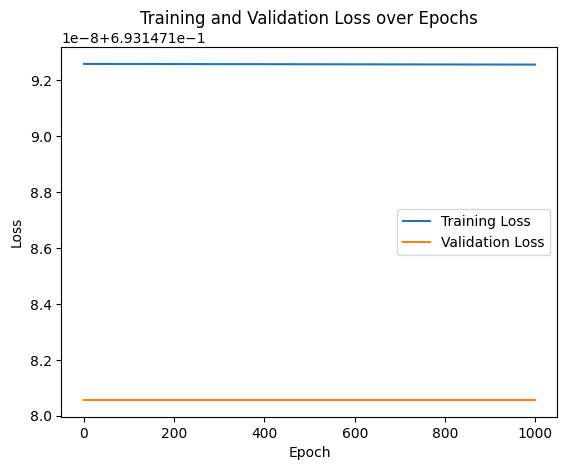

Final Accuracy: 0.5
Confusion Matrix:
[[20.49999999 20.50000001]
 [20.49999999 20.50000001]]
Epoch: 0, Training Loss: 0.6934509496333211, Validation Loss: 0.6934546612473057
Epoch: 1, Training Loss: 0.6934508136115325, Validation Loss: 0.6934544675942317
Epoch: 2, Training Loss: 0.6934506775903729, Validation Loss: 0.6934542728975464
Epoch: 3, Training Loss: 0.6934505415664488, Validation Loss: 0.6934540782018327
Epoch: 4, Training Loss: 0.6934504053314146, Validation Loss: 0.6934538836022696
Epoch: 5, Training Loss: 0.6934502690970148, Validation Loss: 0.693453689003929
Epoch: 6, Training Loss: 0.6934501316367248, Validation Loss: 0.6934534929615521
Epoch: 7, Training Loss: 0.6934499941736809, Validation Loss: 0.6934532969201597
Epoch: 8, Training Loss: 0.6934498561620163, Validation Loss: 0.693453100212456
Epoch: 9, Training Loss: 0.693449715864111, Validation Loss: 0.6934529025610253
Epoch: 10, Training Loss: 0.6934495739231898, Validation Loss: 0.6934527049108511
Epoch: 11, Trainin

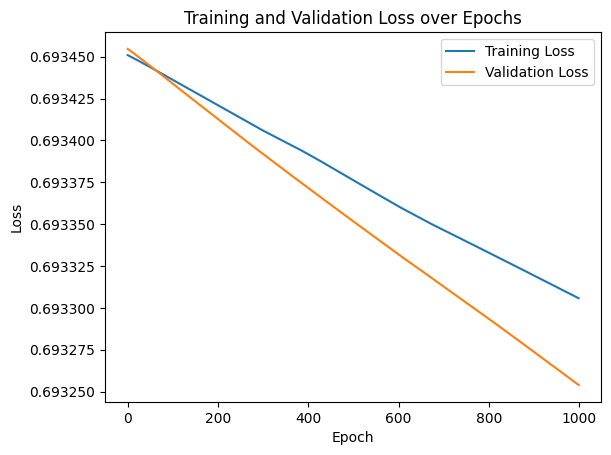

Final Accuracy: 0.6585365853658537
Confusion Matrix:
[[20.47556234 20.49227464]
 [20.46562924 20.47378548]]
Epoch: 0, Training Loss: 0.6956681383100786, Validation Loss: 0.695738662027252
Epoch: 1, Training Loss: 0.6956669307735583, Validation Loss: 0.6957371004557663
Epoch: 2, Training Loss: 0.6956657232538898, Validation Loss: 0.6957355374140225
Epoch: 3, Training Loss: 0.6956645157510668, Validation Loss: 0.6957339662544455
Epoch: 4, Training Loss: 0.6956633082458605, Validation Loss: 0.6957323951092209
Epoch: 5, Training Loss: 0.6956621007381957, Validation Loss: 0.6957308239781638
Epoch: 6, Training Loss: 0.69566089276936, Validation Loss: 0.6957292535120555
Epoch: 7, Training Loss: 0.6956596805364803, Validation Loss: 0.6957276785805816
Epoch: 8, Training Loss: 0.6956584683204723, Validation Loss: 0.6957261036717524
Epoch: 9, Training Loss: 0.6956572561213311, Validation Loss: 0.6957245287855611
Epoch: 10, Training Loss: 0.6956560439198483, Validation Loss: 0.6957229539137888
Epo

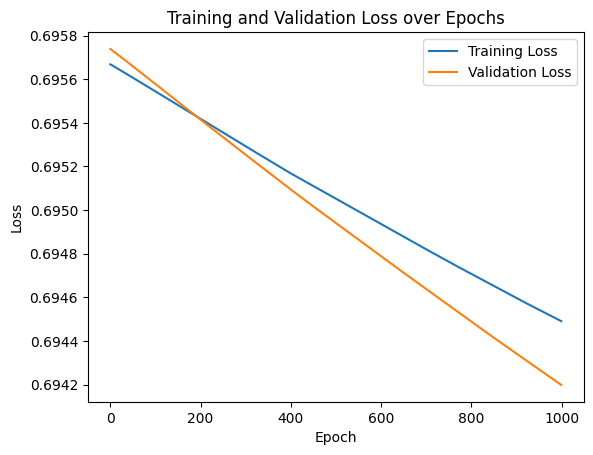

Final Accuracy: 0.6585365853658537
Confusion Matrix:
[[20.30467785 20.45081733]
 [20.22624453 20.29858048]]
Epoch: 0, Training Loss: 0.7024855940408936, Validation Loss: 0.7030938824024953
Epoch: 1, Training Loss: 0.702480221492465, Validation Loss: 0.7030873223692314
Epoch: 2, Training Loss: 0.7024748491749649, Validation Loss: 0.7030807626091643
Epoch: 3, Training Loss: 0.702469477010562, Validation Loss: 0.7030742030591871
Epoch: 4, Training Loss: 0.7024641049988597, Validation Loss: 0.703067624663891
Epoch: 5, Training Loss: 0.7024587332179203, Validation Loss: 0.703061043262438
Epoch: 6, Training Loss: 0.7024533620311684, Validation Loss: 0.7030544646572726
Epoch: 7, Training Loss: 0.7024479752956304, Validation Loss: 0.7030478709394563
Epoch: 8, Training Loss: 0.7024425887017856, Validation Loss: 0.7030412773921167
Epoch: 9, Training Loss: 0.7024372023387966, Validation Loss: 0.7030346841184009
Epoch: 10, Training Loss: 0.7024318105218106, Validation Loss: 0.7030280822291806
Epoc

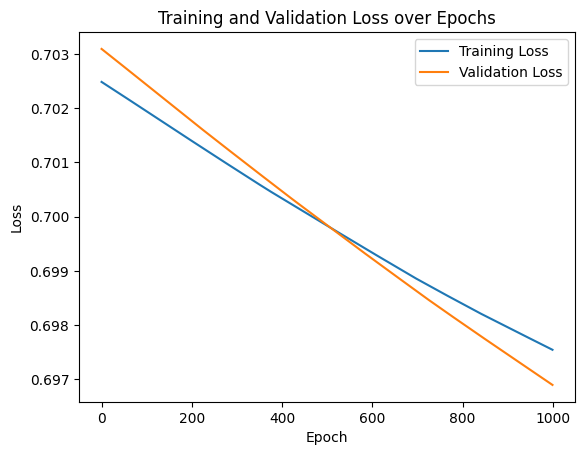

Final Accuracy: 0.4634146341463415
Confusion Matrix:
[[19.87648813 20.33656403]
 [19.56806833 19.85726342]]
Epoch: 0, Training Loss: 0.7190534504851851, Validation Loss: 0.7221520277567977
Epoch: 1, Training Loss: 0.7190360738850962, Validation Loss: 0.7221319046554261
Epoch: 2, Training Loss: 0.719018699010789, Validation Loss: 0.7221117834172515
Epoch: 3, Training Loss: 0.7190013258607818, Validation Loss: 0.7220916640391305
Epoch: 4, Training Loss: 0.7189839546903299, Validation Loss: 0.722071546784262
Epoch: 5, Training Loss: 0.7189665900825649, Validation Loss: 0.7220514093133077
Epoch: 6, Training Loss: 0.7189491824256795, Validation Loss: 0.7220312204125761
Epoch: 7, Training Loss: 0.7189317767488828, Validation Loss: 0.7220110336373242
Epoch: 8, Training Loss: 0.7189143730516653, Validation Loss: 0.7219908489869796
Epoch: 9, Training Loss: 0.7188969539169978, Validation Loss: 0.7219706411891393
Epoch: 10, Training Loss: 0.7188795367650225, Validation Loss: 0.7219504355215207
Ep

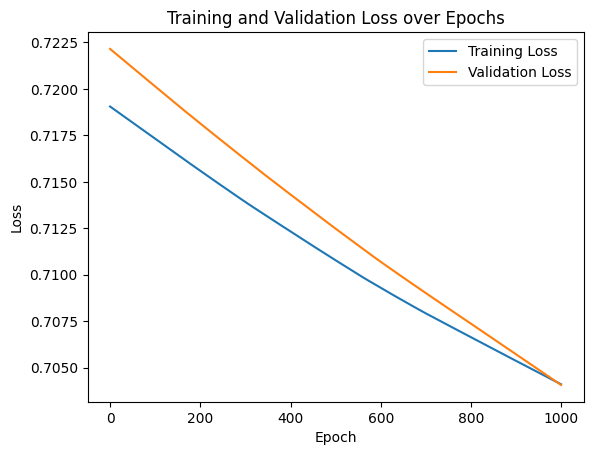

Final Accuracy: 0.45121951219512196
Confusion Matrix:
[[19.21021546 20.09054559]
 [18.41688027 19.08910566]]
Epoch: 0, Training Loss: 0.7551839001256938, Validation Loss: 0.7660191675631616
Epoch: 1, Training Loss: 0.755134708992952, Validation Loss: 0.7659647052190349
Epoch: 2, Training Loss: 0.7550855280650903, Validation Loss: 0.7659102528422725
Epoch: 3, Training Loss: 0.7550363586794032, Validation Loss: 0.7658558119307144
Epoch: 4, Training Loss: 0.7549872165833631, Validation Loss: 0.765801400282181
Epoch: 5, Training Loss: 0.7549379779450157, Validation Loss: 0.765746904749292
Epoch: 6, Training Loss: 0.7548887508472698, Validation Loss: 0.7656923632765393
Epoch: 7, Training Loss: 0.7548394910509187, Validation Loss: 0.7656377591434894
Epoch: 8, Training Loss: 0.754790242806059, Validation Loss: 0.7655831664970305
Epoch: 9, Training Loss: 0.7547410061092099, Validation Loss: 0.7655285853335813
Epoch: 10, Training Loss: 0.7546917809568918, Validation Loss: 0.7654740156495619
Epo

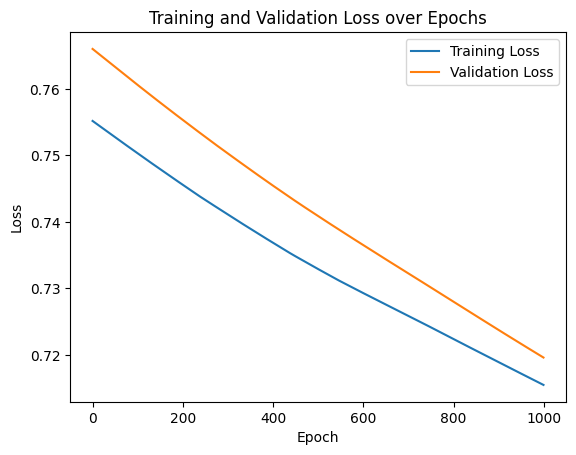

Final Accuracy: 0.45121951219512196
Confusion Matrix:
[[18.5050048  19.66191699]
 [16.93213171 18.0748054 ]]
Epoch: 0, Training Loss: 0.8257044777982893, Validation Loss: 0.853954702548313
Epoch: 1, Training Loss: 0.8255804978857585, Validation Loss: 0.8538201298235452
Epoch: 2, Training Loss: 0.8254565619355314, Validation Loss: 0.8536855986748388
Epoch: 3, Training Loss: 0.8253327114840041, Validation Loss: 0.8535511497252073
Epoch: 4, Training Loss: 0.8252086796070981, Validation Loss: 0.8534165501726244
Epoch: 5, Training Loss: 0.8250846945056781, Validation Loss: 0.8532819954148534
Epoch: 6, Training Loss: 0.8249606594239036, Validation Loss: 0.8531473295947006
Epoch: 7, Training Loss: 0.8248366711459254, Validation Loss: 0.853012621933058
Epoch: 8, Training Loss: 0.8247127296593716, Validation Loss: 0.8528779591210489
Epoch: 9, Training Loss: 0.8245888349518711, Validation Loss: 0.8527433411461628
Epoch: 10, Training Loss: 0.8244649870110504, Validation Loss: 0.8526087679958916
E

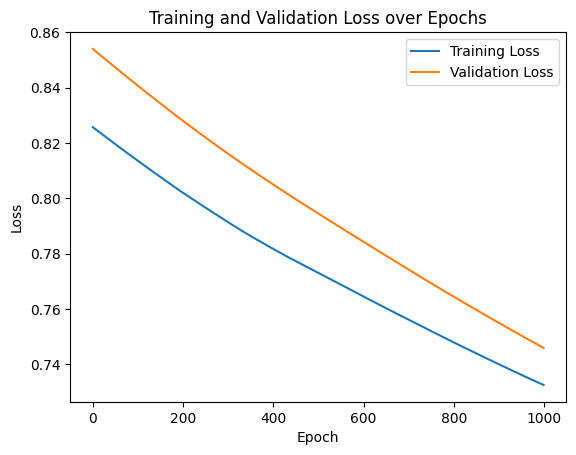

Final Accuracy: 0.524390243902439
Confusion Matrix:
[[18.09571136 18.94034175]
 [15.5831367  16.93919184]]
Epoch: 0, Training Loss: 0.946150060299794, Validation Loss: 1.0047136186670445
Epoch: 1, Training Loss: 0.9458791149430771, Validation Loss: 1.0044214017829143
Epoch: 2, Training Loss: 0.9456082953245658, Validation Loss: 1.0041293025773332
Epoch: 3, Training Loss: 0.945337256107927, Validation Loss: 1.0038370365840636
Epoch: 4, Training Loss: 0.9450663475050753, Validation Loss: 1.0035448938535996
Epoch: 5, Training Loss: 0.9447953869596297, Validation Loss: 1.003252620882929
Epoch: 6, Training Loss: 0.9445245571148, Validation Loss: 1.0029604713003317
Epoch: 7, Training Loss: 0.9442538184915485, Validation Loss: 1.0026683688474354
Epoch: 8, Training Loss: 0.9439832106275089, Validation Loss: 1.002376360990168
Epoch: 9, Training Loss: 0.9437127335101637, Validation Loss: 1.0020844765670984
Epoch: 10, Training Loss: 0.9434423871269687, Validation Loss: 1.0017927073256636
Epoch: 1

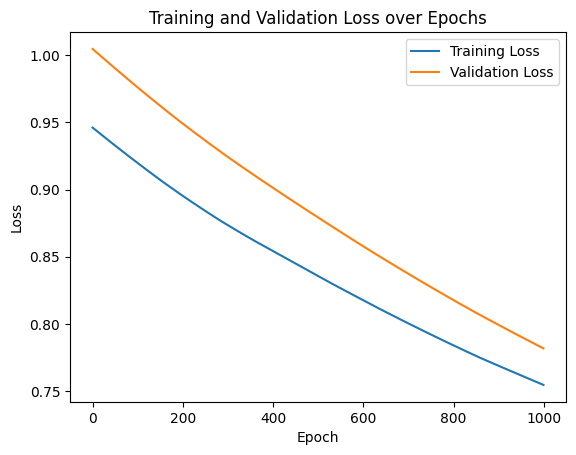

Final Accuracy: 0.5487804878048781
Confusion Matrix:
[[18.17422019 17.91312854]
 [14.65266576 15.90993407]]
Epoch: 0, Training Loss: 1.127604164230229, Validation Loss: 1.230783160243603
Epoch: 1, Training Loss: 1.1270936560182645, Validation Loss: 1.2302325446393785
Epoch: 2, Training Loss: 1.1265835539826012, Validation Loss: 1.229682290849503
Epoch: 3, Training Loss: 1.1260730108092205, Validation Loss: 1.2291317022180805
Epoch: 4, Training Loss: 1.125562445135127, Validation Loss: 1.2285809459137438
Epoch: 5, Training Loss: 1.1250520650830633, Validation Loss: 1.2280305372938665
Epoch: 6, Training Loss: 1.1245419642426184, Validation Loss: 1.227480388891537
Epoch: 7, Training Loss: 1.1240321426334563, Validation Loss: 1.2269303687123032
Epoch: 8, Training Loss: 1.123522600275215, Validation Loss: 1.2263805040780642
Epoch: 9, Training Loss: 1.1230133371875086, Validation Loss: 1.2258308880524864
Epoch: 10, Training Loss: 1.1225043533899262, Validation Loss: 1.2252813726173242
Epoch:

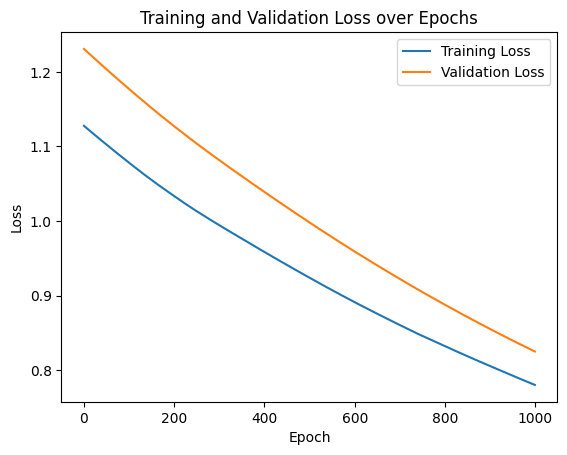

Final Accuracy: 0.7317073170731707
Confusion Matrix:
[[18.7460326  16.63482092]
 [14.12882024 15.13229545]]
Epoch: 0, Training Loss: 1.3771384157871498, Validation Loss: 1.5404238793257905
Epoch: 1, Training Loss: 1.3762811124008338, Validation Loss: 1.5394956777940985
Epoch: 2, Training Loss: 1.3754233929186424, Validation Loss: 1.5385672094318281
Epoch: 3, Training Loss: 1.3745661962299496, Validation Loss: 1.537639217388659
Epoch: 4, Training Loss: 1.3737089224580536, Validation Loss: 1.5367111824458328
Epoch: 5, Training Loss: 1.3728521721399471, Validation Loss: 1.5357836244349556
Epoch: 6, Training Loss: 1.3719959452994093, Validation Loss: 1.5348565433765604
Epoch: 7, Training Loss: 1.371140241960302, Validation Loss: 1.533929815736792
Epoch: 8, Training Loss: 1.3702850621465745, Validation Loss: 1.5330033603039201
Epoch: 9, Training Loss: 1.3694304058822608, Validation Loss: 1.5320772358819426
Epoch: 10, Training Loss: 1.3685762731914826, Validation Loss: 1.5311512720346003
Epo

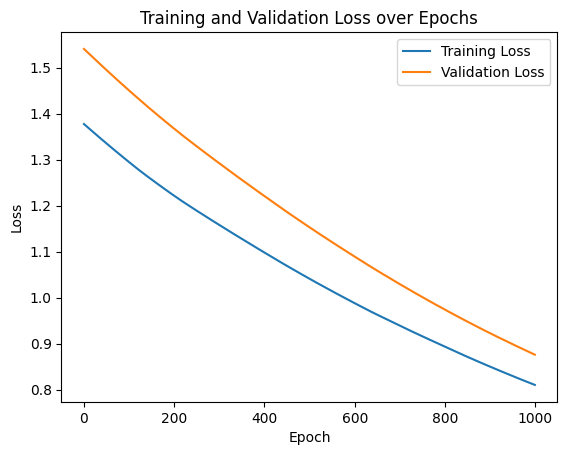

Final Accuracy: 0.7439024390243902
Confusion Matrix:
[[19.71698705 15.24532004]
 [13.87698905 14.65025799]]
Epoch: 0, Training Loss: 1.7009127005311995, Validation Loss: 1.9416177062260525
Epoch: 1, Training Loss: 1.6995827538377004, Validation Loss: 1.9401697789768688
Epoch: 2, Training Loss: 1.6982524716920284, Validation Loss: 1.938721613719214
Epoch: 3, Training Loss: 1.6969224982589195, Validation Loss: 1.9372733522676062
Epoch: 4, Training Loss: 1.6955932832407892, Validation Loss: 1.9358261391624054
Epoch: 5, Training Loss: 1.6942650942251425, Validation Loss: 1.93437974797206
Epoch: 6, Training Loss: 1.6929377336459797, Validation Loss: 1.9329341829423483
Epoch: 7, Training Loss: 1.6916113268608233, Validation Loss: 1.9314893262161215
Epoch: 8, Training Loss: 1.6902858557096887, Validation Loss: 1.9300449428615825
Epoch: 9, Training Loss: 1.6889613199695785, Validation Loss: 1.9286008817995302
Epoch: 10, Training Loss: 1.6876378090566375, Validation Loss: 1.9271574967163068
Epo

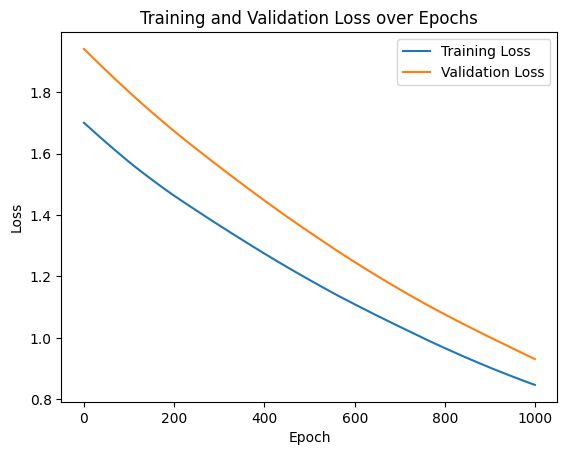

Final Accuracy: 0.7439024390243902
Confusion Matrix:
[[20.98528417 13.8663771 ]
 [13.79264924 14.48954757]]
Epoch: 0, Training Loss: 0.693147300753471, Validation Loss: 0.6931471805599454
Epoch: 1, Training Loss: 0.6931473007510278, Validation Loss: 0.6931471805599453
Epoch: 2, Training Loss: 0.6931473007485847, Validation Loss: 0.6931471805599453
Epoch: 3, Training Loss: 0.6931473007461428, Validation Loss: 0.6931471805599452
Epoch: 4, Training Loss: 0.6931473007437018, Validation Loss: 0.6931471805599452
Epoch: 5, Training Loss: 0.6931473007412612, Validation Loss: 0.6931471805599453
Epoch: 6, Training Loss: 0.6931473007388218, Validation Loss: 0.6931471805599454
Epoch: 7, Training Loss: 0.6931473007363826, Validation Loss: 0.6931471805599454
Epoch: 8, Training Loss: 0.6931473007339449, Validation Loss: 0.6931471805599454
Epoch: 9, Training Loss: 0.6931473007315075, Validation Loss: 0.6931471805599454
Epoch: 10, Training Loss: 0.693147300729071, Validation Loss: 0.6931471805599453
Ep

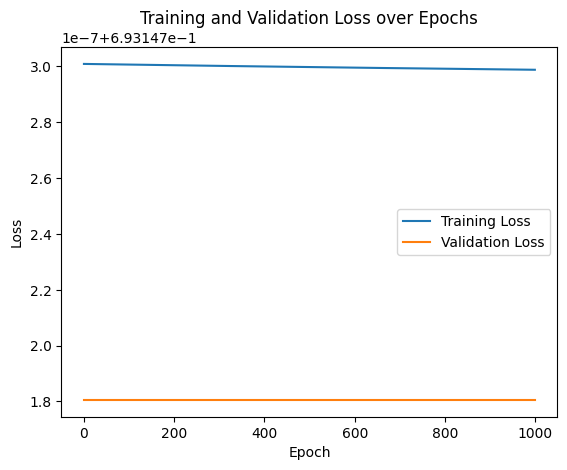

Final Accuracy: 0.5
Confusion Matrix:
[[20.49999944 20.50000056]
 [20.49999944 20.50000056]]
Epoch: 0, Training Loss: 0.6934499441214279, Validation Loss: 0.6934529072873569
Epoch: 1, Training Loss: 0.693448515679109, Validation Loss: 0.6934509020829998
Epoch: 2, Training Loss: 0.6934470672526676, Validation Loss: 0.6934488784003339
Epoch: 3, Training Loss: 0.693445597918549, Validation Loss: 0.6934468089615137
Epoch: 4, Training Loss: 0.6934441126513614, Validation Loss: 0.6934447125892874
Epoch: 5, Training Loss: 0.6934426219224287, Validation Loss: 0.693442610551607
Epoch: 6, Training Loss: 0.6934411077416011, Validation Loss: 0.6934404815244978
Epoch: 7, Training Loss: 0.6934395936347861, Validation Loss: 0.6934383526338327
Epoch: 8, Training Loss: 0.6934380691132193, Validation Loss: 0.6934362118313175
Epoch: 9, Training Loss: 0.6934365518218665, Validation Loss: 0.6934340793524555
Epoch: 10, Training Loss: 0.693435028830453, Validation Loss: 0.6934319397758975
Epoch: 11, Training

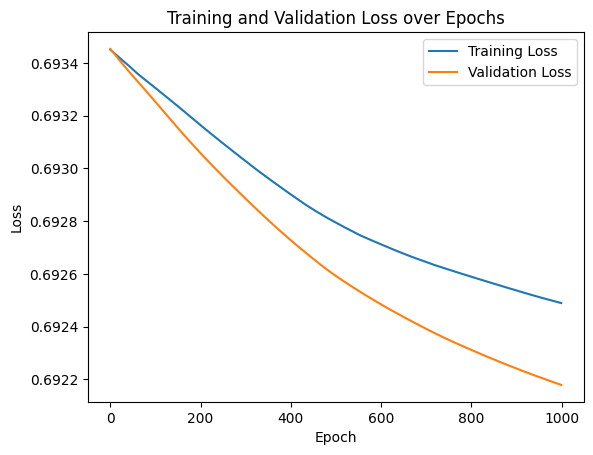

Final Accuracy: 0.7560975609756098
Confusion Matrix:
[[20.49366013 20.4742155 ]
 [20.42792908 20.48827007]]
Epoch: 0, Training Loss: 0.69565823238947, Validation Loss: 0.6957245713125376
Epoch: 1, Training Loss: 0.6956460973299747, Validation Loss: 0.6957087992707329
Epoch: 2, Training Loss: 0.6956337877226646, Validation Loss: 0.6956929203734655
Epoch: 3, Training Loss: 0.6956214038118682, Validation Loss: 0.6956768635477489
Epoch: 4, Training Loss: 0.6956089787203675, Validation Loss: 0.6956608367954615
Epoch: 5, Training Loss: 0.6955964513790819, Validation Loss: 0.6956446948345704
Epoch: 6, Training Loss: 0.6955839187698891, Validation Loss: 0.6956284970677212
Epoch: 7, Training Loss: 0.6955713356404056, Validation Loss: 0.6956121956757446
Epoch: 8, Training Loss: 0.6955587608704418, Validation Loss: 0.6955959093563889
Epoch: 9, Training Loss: 0.6955461638790585, Validation Loss: 0.6955795958113267
Epoch: 10, Training Loss: 0.6955335228441845, Validation Loss: 0.6955632275728575
Ep

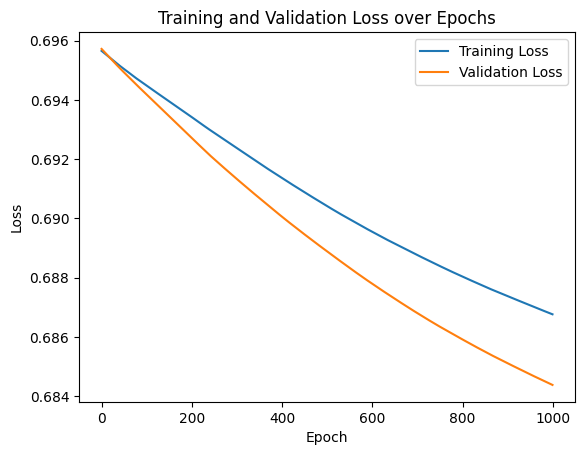

Final Accuracy: 0.7804878048780488
Confusion Matrix:
[[20.56542488 20.25934862]
 [19.98097248 20.41605113]]
Epoch: 0, Training Loss: 0.7024408347354658, Validation Loss: 0.7030347842637068
Epoch: 1, Training Loss: 0.7023869253669042, Validation Loss: 0.7029687771823254
Epoch: 2, Training Loss: 0.7023329907259559, Validation Loss: 0.7029027401907441
Epoch: 3, Training Loss: 0.7022788153713762, Validation Loss: 0.70283652551407
Epoch: 4, Training Loss: 0.702224546343795, Validation Loss: 0.7027700280784569
Epoch: 5, Training Loss: 0.7021698679115578, Validation Loss: 0.7027031946280338
Epoch: 6, Training Loss: 0.7021151121804503, Validation Loss: 0.7026364769664855
Epoch: 7, Training Loss: 0.7020603796965167, Validation Loss: 0.7025697486670149
Epoch: 8, Training Loss: 0.7020056553368299, Validation Loss: 0.7025029508712582
Epoch: 9, Training Loss: 0.7019510937828534, Validation Loss: 0.7024361372844149
Epoch: 10, Training Loss: 0.7018965251200165, Validation Loss: 0.7023692127692274
Epo

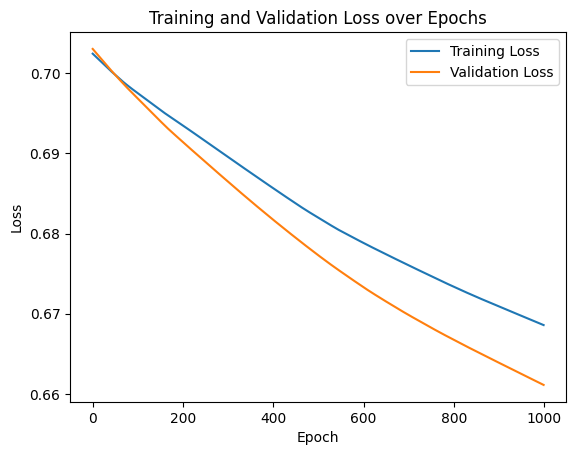

Final Accuracy: 0.7073170731707317
Confusion Matrix:
[[21.09201226 19.56830487]
 [18.97438554 20.28845996]]
Epoch: 0, Training Loss: 0.7189077215236529, Validation Loss: 0.7219704046856313
Epoch: 1, Training Loss: 0.71873362471825, Validation Loss: 0.721768439902311
Epoch: 2, Training Loss: 0.7185597257216791, Validation Loss: 0.7215667345727073
Epoch: 3, Training Loss: 0.7183859391443638, Validation Loss: 0.721364759817886
Epoch: 4, Training Loss: 0.7182114157581017, Validation Loss: 0.7211621977932775
Epoch: 5, Training Loss: 0.7180366712451184, Validation Loss: 0.7209592319093054
Epoch: 6, Training Loss: 0.717862500843586, Validation Loss: 0.7207565663472031
Epoch: 7, Training Loss: 0.7176885269938013, Validation Loss: 0.7205545631598785
Epoch: 8, Training Loss: 0.7175144732723552, Validation Loss: 0.7203523960377903
Epoch: 9, Training Loss: 0.7173412192185123, Validation Loss: 0.7201509379387555
Epoch: 10, Training Loss: 0.7171677485053615, Validation Loss: 0.7199492894060197
Epoch

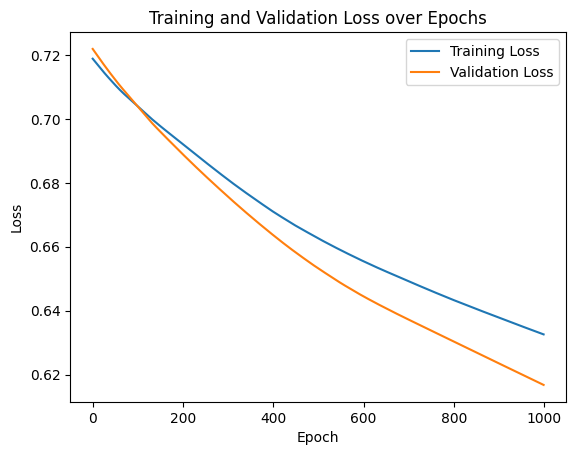

Final Accuracy: 0.7317073170731707
Confusion Matrix:
[[22.70010828 18.17072193]
 [17.99790213 20.57231378]]
Epoch: 0, Training Loss: 0.7547711611009735, Validation Loss: 0.765528240433653
Epoch: 1, Training Loss: 0.7542793420178195, Validation Loss: 0.7649829908006573
Epoch: 2, Training Loss: 0.7537886742667351, Validation Loss: 0.7644382206596085
Epoch: 3, Training Loss: 0.7532982996593289, Validation Loss: 0.7638934415388203
Epoch: 4, Training Loss: 0.7528080933814062, Validation Loss: 0.7633486027999911
Epoch: 5, Training Loss: 0.7523202587209828, Validation Loss: 0.762805513116826
Epoch: 6, Training Loss: 0.7518333592539279, Validation Loss: 0.7622627718989816
Epoch: 7, Training Loss: 0.7513481602950702, Validation Loss: 0.7617217966915523
Epoch: 8, Training Loss: 0.7508631757206279, Validation Loss: 0.7611817143176247
Epoch: 9, Training Loss: 0.7503803895033431, Validation Loss: 0.76064372624751
Epoch: 10, Training Loss: 0.7498980475148944, Validation Loss: 0.7601062582371602
Epoc

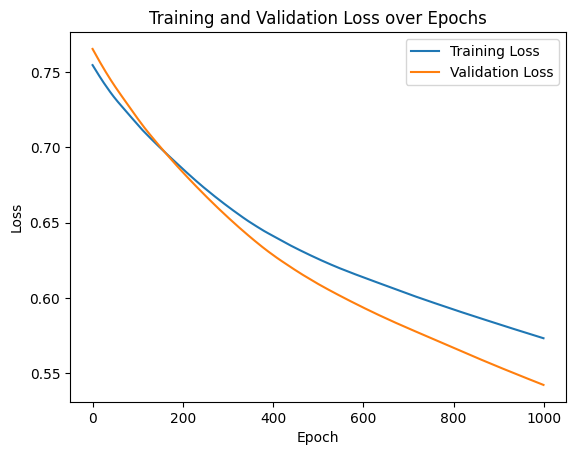

Final Accuracy: 0.7439024390243902
Confusion Matrix:
[[25.1696355  16.0703789 ]
 [16.76121714 22.47965235]]
Epoch: 0, Training Loss: 0.8246624757169486, Validation Loss: 0.8527415982454507
Epoch: 1, Training Loss: 0.8234256821904898, Validation Loss: 0.8513977070924967
Epoch: 2, Training Loss: 0.8221935568889209, Validation Loss: 0.8500564857347828
Epoch: 3, Training Loss: 0.8209624841004725, Validation Loss: 0.8487158431927648
Epoch: 4, Training Loss: 0.81973904316542, Validation Loss: 0.847381446744706
Epoch: 5, Training Loss: 0.818523698800763, Validation Loss: 0.8460541432050304
Epoch: 6, Training Loss: 0.8173126769740331, Validation Loss: 0.8447306889022782
Epoch: 7, Training Loss: 0.8161076626938039, Validation Loss: 0.843412195723708
Epoch: 8, Training Loss: 0.8149070159079748, Validation Loss: 0.8420959003611842
Epoch: 9, Training Loss: 0.8137152438545034, Validation Loss: 0.8407878817069199
Epoch: 10, Training Loss: 0.8125309346703558, Validation Loss: 0.8394904013412968
Epoch

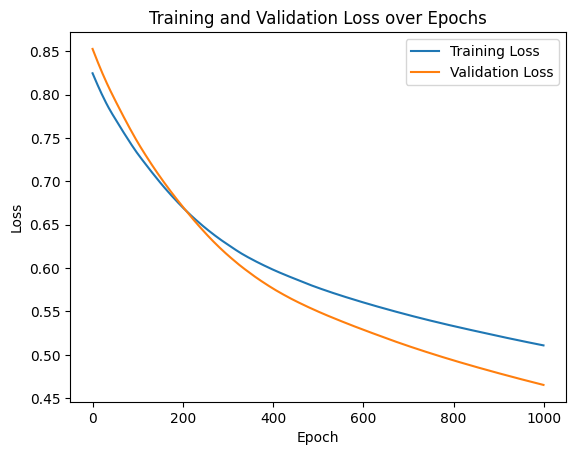

Final Accuracy: 0.8536585365853658
Confusion Matrix:
[[28.10860873 13.34290679]
 [15.53379905 24.34484419]]
Epoch: 0, Training Loss: 0.9438722513452722, Validation Loss: 1.0020816807385617
Epoch: 1, Training Loss: 0.9411736444658942, Validation Loss: 0.9991674362291718
Epoch: 2, Training Loss: 0.9384812748665957, Validation Loss: 0.9962561796900157
Epoch: 3, Training Loss: 0.9358072614181864, Validation Loss: 0.9933597374672435
Epoch: 4, Training Loss: 0.9331538564412454, Validation Loss: 0.9904815350677577
Epoch: 5, Training Loss: 0.9305204638892124, Validation Loss: 0.9876221562323848
Epoch: 6, Training Loss: 0.927902508478528, Validation Loss: 0.9847668440111289
Epoch: 7, Training Loss: 0.9253018234121667, Validation Loss: 0.9819251747966343
Epoch: 8, Training Loss: 0.9227211023268165, Validation Loss: 0.9791058621770912
Epoch: 9, Training Loss: 0.9201525688800873, Validation Loss: 0.9763100567190117
Epoch: 10, Training Loss: 0.9175994329440417, Validation Loss: 0.9735283705550576
E

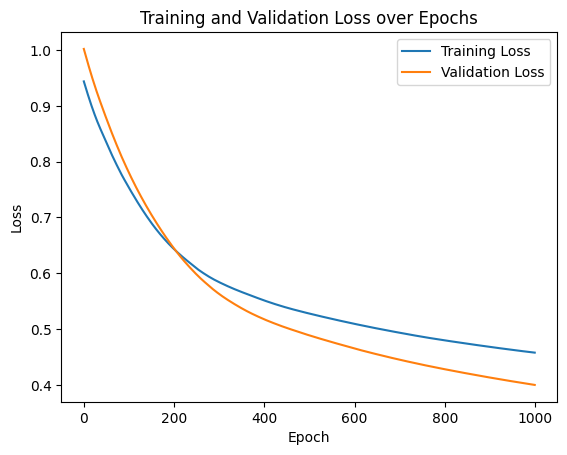

Final Accuracy: 0.9024390243902439
Confusion Matrix:
[[30.90310357 10.66477412]
 [14.58599499 25.89653833]]
Epoch: 0, Training Loss: 1.1233117966299362, Validation Loss: 1.225827349499424
Epoch: 1, Training Loss: 1.1182323221587447, Validation Loss: 1.2203398533180598
Epoch: 2, Training Loss: 1.113169099574828, Validation Loss: 1.2148638260178712
Epoch: 3, Training Loss: 1.108142269006214, Validation Loss: 1.2094177788577047
Epoch: 4, Training Loss: 1.1031721053536137, Validation Loss: 1.2040102953418987
Epoch: 5, Training Loss: 1.098235690217905, Validation Loss: 1.198622329101496
Epoch: 6, Training Loss: 1.09334620718707, Validation Loss: 1.1932753440228183
Epoch: 7, Training Loss: 1.088484535933418, Validation Loss: 1.1879699501968037
Epoch: 8, Training Loss: 1.0836581540660828, Validation Loss: 1.182709076357289
Epoch: 9, Training Loss: 1.0788648116910717, Validation Loss: 1.1774968825843184
Epoch: 10, Training Loss: 1.0740950094164252, Validation Loss: 1.1723094348186969
Epoch: 11

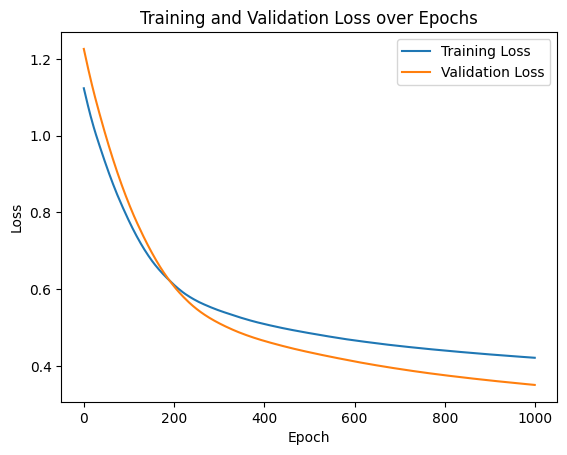

Final Accuracy: 0.926829268292683
Confusion Matrix:
[[33.12297377  8.41949153]
 [13.89634276 27.16785256]]
Epoch: 0, Training Loss: 1.3699318993928649, Validation Loss: 1.5320727543071835
Epoch: 1, Training Loss: 1.3614103650191534, Validation Loss: 1.5228273558009684
Epoch: 2, Training Loss: 1.3529343435425465, Validation Loss: 1.5136139918241658
Epoch: 3, Training Loss: 1.3445370641917291, Validation Loss: 1.5044582679371432
Epoch: 4, Training Loss: 1.3362209560513452, Validation Loss: 1.495348772761858
Epoch: 5, Training Loss: 1.3279711203806752, Validation Loss: 1.4862953456233643
Epoch: 6, Training Loss: 1.319792893189094, Validation Loss: 1.4773229501796228
Epoch: 7, Training Loss: 1.3116791851597553, Validation Loss: 1.4684612290186505
Epoch: 8, Training Loss: 1.3036250624391141, Validation Loss: 1.4596665853217634
Epoch: 9, Training Loss: 1.2956183024395134, Validation Loss: 1.4509157848203238
Epoch: 10, Training Loss: 1.2876961211990325, Validation Loss: 1.4422454966052496
Epo

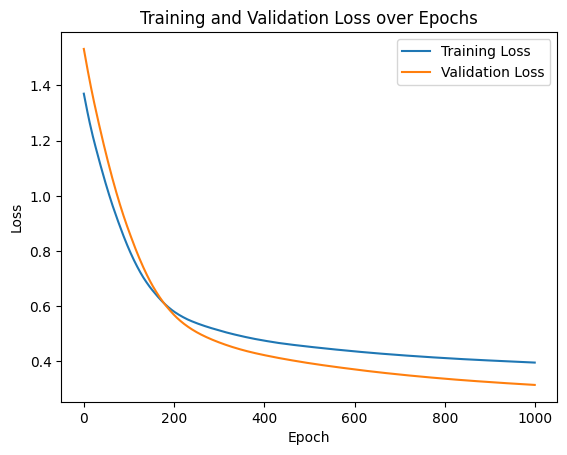

Final Accuracy: 0.9512195121951219
Confusion Matrix:
[[34.70483029  6.84264543]
 [13.32086172 28.27024974]]
Epoch: 0, Training Loss: 1.6897390688518439, Validation Loss: 1.928595553223459
Epoch: 1, Training Loss: 1.6765242108781402, Validation Loss: 1.9141740414692587
Epoch: 2, Training Loss: 1.6634051941961852, Validation Loss: 1.8998234328922312
Epoch: 3, Training Loss: 1.6504368129794114, Validation Loss: 1.885561223083034
Epoch: 4, Training Loss: 1.6375923915695898, Validation Loss: 1.871387121073466
Epoch: 5, Training Loss: 1.62488642156699, Validation Loss: 1.8573318248514825
Epoch: 6, Training Loss: 1.6122761020388716, Validation Loss: 1.8434708679480132
Epoch: 7, Training Loss: 1.5997693376821938, Validation Loss: 1.8297339438899956
Epoch: 8, Training Loss: 1.5873535362969322, Validation Loss: 1.816072794111716
Epoch: 9, Training Loss: 1.575094242800352, Validation Loss: 1.8025466269161583
Epoch: 10, Training Loss: 1.563068025881666, Validation Loss: 1.7891146001551015
Epoch: 1

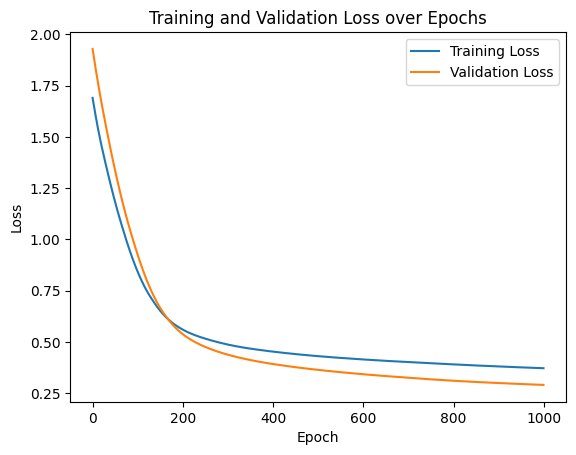

Final Accuracy: 0.9390243902439024
Confusion Matrix:
[[35.86186506  5.72904637]
 [12.91235771 29.16167185]]
Epoch: 0, Training Loss: 0.6931483826023149, Validation Loss: 0.6931471805599454
Epoch: 1, Training Loss: 0.6931483823560873, Validation Loss: 0.6931471805599451
Epoch: 2, Training Loss: 0.6931483821106474, Validation Loss: 0.6931471805599454
Epoch: 3, Training Loss: 0.6931483818659926, Validation Loss: 0.6931471805599454
Epoch: 4, Training Loss: 0.69314838162212, Validation Loss: 0.6931471805599454
Epoch: 5, Training Loss: 0.6931483813790277, Validation Loss: 0.6931471805599454
Epoch: 6, Training Loss: 0.6931483811367131, Validation Loss: 0.6931471805599454
Epoch: 7, Training Loss: 0.6931483808951728, Validation Loss: 0.6931471805599454
Epoch: 8, Training Loss: 0.6931483806544059, Validation Loss: 0.6931471805599457
Epoch: 9, Training Loss: 0.6931483804144084, Validation Loss: 0.6931471805599458
Epoch: 10, Training Loss: 0.6931483801751788, Validation Loss: 0.6931471805599461
Ep

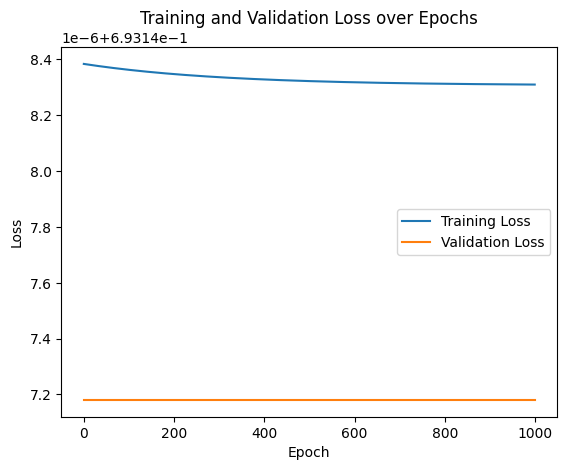

Final Accuracy: 0.5
Confusion Matrix:
[[20.49998026 20.50001974]
 [20.49998026 20.50001974]]
Epoch: 0, Training Loss: 0.6934390465365486, Validation Loss: 0.6934344111869496
Epoch: 1, Training Loss: 0.693423885678427, Validation Loss: 0.6934133677786227
Epoch: 2, Training Loss: 0.6934086498492764, Validation Loss: 0.6933924153959728
Epoch: 3, Training Loss: 0.6933944880637329, Validation Loss: 0.6933720613687131
Epoch: 4, Training Loss: 0.6933790246786248, Validation Loss: 0.6933520186950081
Epoch: 5, Training Loss: 0.6933633578920211, Validation Loss: 0.6933322765206409
Epoch: 6, Training Loss: 0.6933489814013419, Validation Loss: 0.6933132087892275
Epoch: 7, Training Loss: 0.6933355131966832, Validation Loss: 0.6932939841655642
Epoch: 8, Training Loss: 0.6933218615040536, Validation Loss: 0.693274190646232
Epoch: 9, Training Loss: 0.6933081703087105, Validation Loss: 0.6932542681575402
Epoch: 10, Training Loss: 0.6932944942794663, Validation Loss: 0.6932345028585039
Epoch: 11, Traini

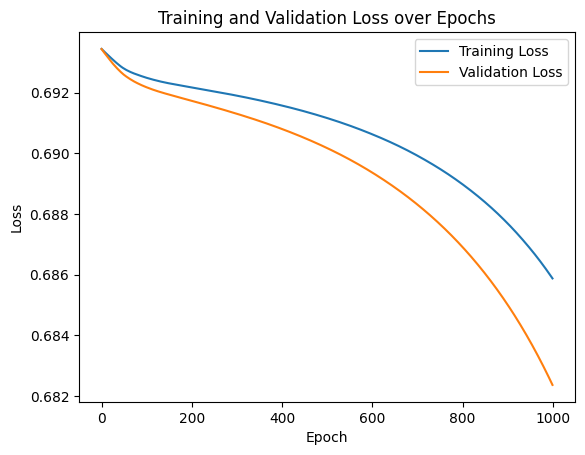

Final Accuracy: 0.6951219512195121
Confusion Matrix:
[[20.79316799 20.26235016]
 [20.23028835 20.59755058]]
Epoch: 0, Training Loss: 0.6955564716675013, Validation Loss: 0.6955807215740726
Epoch: 1, Training Loss: 0.695430346335401, Validation Loss: 0.6954174272097939
Epoch: 2, Training Loss: 0.6953047593574168, Validation Loss: 0.6952562689477839
Epoch: 3, Training Loss: 0.6951797457962273, Validation Loss: 0.6950964642193558
Epoch: 4, Training Loss: 0.6950621796282442, Validation Loss: 0.6949420042017689
Epoch: 5, Training Loss: 0.6949456385193471, Validation Loss: 0.6947892371216068
Epoch: 6, Training Loss: 0.6948296567847824, Validation Loss: 0.6946383873842429
Epoch: 7, Training Loss: 0.6947170237283001, Validation Loss: 0.6944889012925876
Epoch: 8, Training Loss: 0.6946065917272995, Validation Loss: 0.6943427861177676
Epoch: 9, Training Loss: 0.6944987155463486, Validation Loss: 0.6941977641818918
Epoch: 10, Training Loss: 0.6943917774809402, Validation Loss: 0.6940517560370619
E

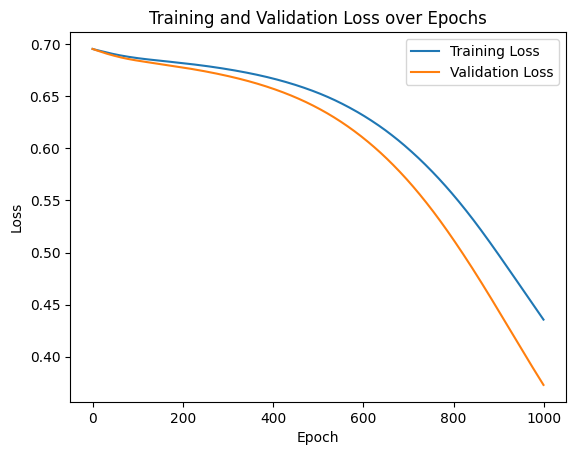

Final Accuracy: 0.9512195121951219
Confusion Matrix:
[[30.43073197 10.94439616]
 [13.02595709 27.06314694]]
Epoch: 0, Training Loss: 0.7019877265266359, Validation Loss: 0.7024379527428362
Epoch: 1, Training Loss: 0.7014438951117963, Validation Loss: 0.701771699638695
Epoch: 2, Training Loss: 0.7009029235882154, Validation Loss: 0.7011185195168563
Epoch: 3, Training Loss: 0.7003782617163746, Validation Loss: 0.7004774117310927
Epoch: 4, Training Loss: 0.6998743805596941, Validation Loss: 0.6998492121346361
Epoch: 5, Training Loss: 0.6993750449338266, Validation Loss: 0.6992297631651144
Epoch: 6, Training Loss: 0.6988853047528502, Validation Loss: 0.6986220908704068
Epoch: 7, Training Loss: 0.6984272805823923, Validation Loss: 0.6980336116498503
Epoch: 8, Training Loss: 0.6979935684542524, Validation Loss: 0.6974637799912098
Epoch: 9, Training Loss: 0.6975741656598784, Validation Loss: 0.696897744625595
Epoch: 10, Training Loss: 0.6971580359015197, Validation Loss: 0.6963322590680223
Ep

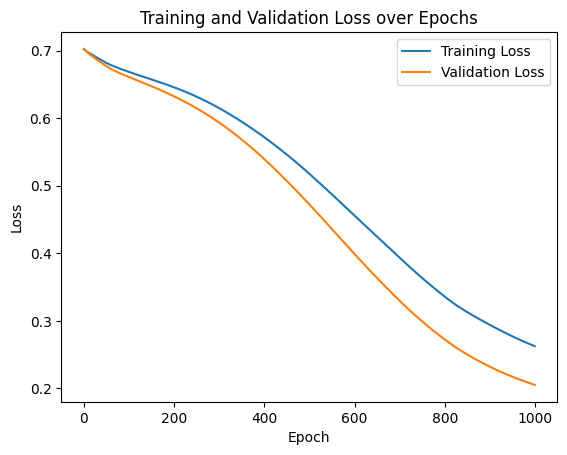

Final Accuracy: 0.9512195121951219
Confusion Matrix:
[[35.84553152  5.37214622]
 [ 7.45792592 33.02916313]]
Epoch: 0, Training Loss: 0.7174456013440984, Validation Loss: 0.7201474666988527
Epoch: 1, Training Loss: 0.7157215583942312, Validation Loss: 0.7181510439413884
Epoch: 2, Training Loss: 0.7140295143272439, Validation Loss: 0.7162038231721948
Epoch: 3, Training Loss: 0.7124323438557519, Validation Loss: 0.7143154241314646
Epoch: 4, Training Loss: 0.7108766575079808, Validation Loss: 0.7124754228990984
Epoch: 5, Training Loss: 0.7093861550556135, Validation Loss: 0.7106928712991931
Epoch: 6, Training Loss: 0.7080078467803114, Validation Loss: 0.7090155821759084
Epoch: 7, Training Loss: 0.7067148136093834, Validation Loss: 0.7073565567732003
Epoch: 8, Training Loss: 0.7054402900910978, Validation Loss: 0.705709063613635
Epoch: 9, Training Loss: 0.7041801049332181, Validation Loss: 0.7040553379050972
Epoch: 10, Training Loss: 0.702909580626755, Validation Loss: 0.702392226897013
Epo

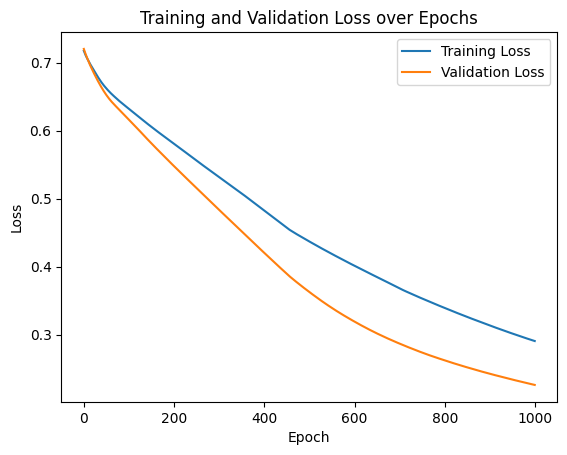

Final Accuracy: 0.9512195121951219
Confusion Matrix:
[[36.66684322  4.50315394]
 [ 9.3716091  30.98106949]]
Epoch: 0, Training Loss: 0.7506645293629196, Validation Loss: 0.7606325575587244
Epoch: 1, Training Loss: 0.7459222580801695, Validation Loss: 0.7553673141800461
Epoch: 2, Training Loss: 0.7414170948349287, Validation Loss: 0.7503104966964089
Epoch: 3, Training Loss: 0.7371524038806869, Validation Loss: 0.7454729543452419
Epoch: 4, Training Loss: 0.7331637773537556, Validation Loss: 0.7408965246254862
Epoch: 5, Training Loss: 0.7295255215939905, Validation Loss: 0.7365322952409483
Epoch: 6, Training Loss: 0.7260901788232323, Validation Loss: 0.7322533548147043
Epoch: 7, Training Loss: 0.7226128459337376, Validation Loss: 0.7280079015091584
Epoch: 8, Training Loss: 0.7191315716630313, Validation Loss: 0.7237371024469422
Epoch: 9, Training Loss: 0.7156836603232869, Validation Loss: 0.7195653983387841
Epoch: 10, Training Loss: 0.7122900586483506, Validation Loss: 0.7154802568244546


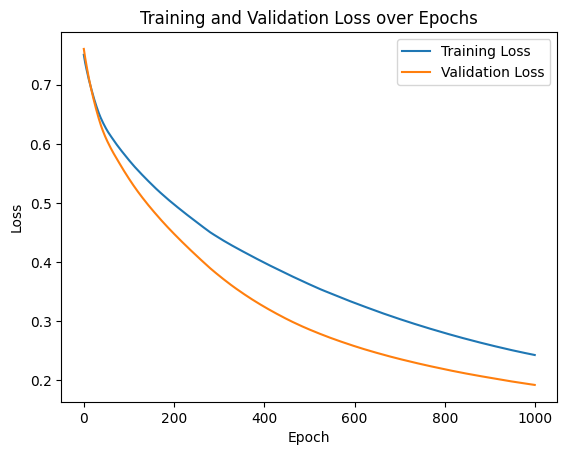

Final Accuracy: 0.975609756097561
Confusion Matrix:
[[37.33746929  3.90799062]
 [ 8.98898281 34.26505001]]
Epoch: 0, Training Loss: 0.8143855715214495, Validation Loss: 0.8407484998135483
Epoch: 1, Training Loss: 0.802735408459558, Validation Loss: 0.8280368755106823
Epoch: 2, Training Loss: 0.792066453140371, Validation Loss: 0.8161300025215402
Epoch: 3, Training Loss: 0.7823229036105667, Validation Loss: 0.8050207205847753
Epoch: 4, Training Loss: 0.7735943789072146, Validation Loss: 0.7945278290999847
Epoch: 5, Training Loss: 0.765020424187428, Validation Loss: 0.784273113632817
Epoch: 6, Training Loss: 0.7566166800125901, Validation Loss: 0.7742008264195092
Epoch: 7, Training Loss: 0.7483974725308072, Validation Loss: 0.764391991537829
Epoch: 8, Training Loss: 0.7404868261792187, Validation Loss: 0.7549309461313504
Epoch: 9, Training Loss: 0.7329233967332048, Validation Loss: 0.7458196239003708
Epoch: 10, Training Loss: 0.7259434435468612, Validation Loss: 0.7371654068849463
Epoch:

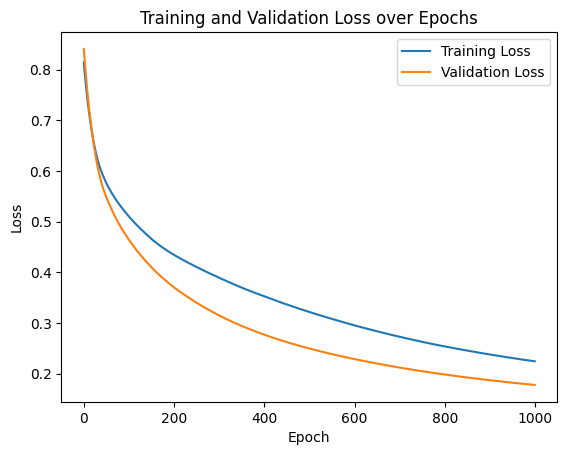

Final Accuracy: 0.975609756097561
Confusion Matrix:
[[37.75164773  3.49465651]
 [ 8.4151668  35.08392832]]
Epoch: 0, Training Loss: 0.9216021300716337, Validation Loss: 0.9762441345016784
Epoch: 1, Training Loss: 0.8969283721907785, Validation Loss: 0.9492551111831475
Epoch: 2, Training Loss: 0.8747946640367533, Validation Loss: 0.9243683752981273
Epoch: 3, Training Loss: 0.8555029277645296, Validation Loss: 0.9014402570883523
Epoch: 4, Training Loss: 0.8367666372040515, Validation Loss: 0.8792939599755175
Epoch: 5, Training Loss: 0.8187485928644054, Validation Loss: 0.8578044979498322
Epoch: 6, Training Loss: 0.8014209617456867, Validation Loss: 0.8372804361313728
Epoch: 7, Training Loss: 0.7850264438179008, Validation Loss: 0.8176876889515482
Epoch: 8, Training Loss: 0.7697155899547047, Validation Loss: 0.7992250700114942
Epoch: 9, Training Loss: 0.7553673481180201, Validation Loss: 0.7816096325583298
Epoch: 10, Training Loss: 0.7415352732293722, Validation Loss: 0.7648726062488788
E

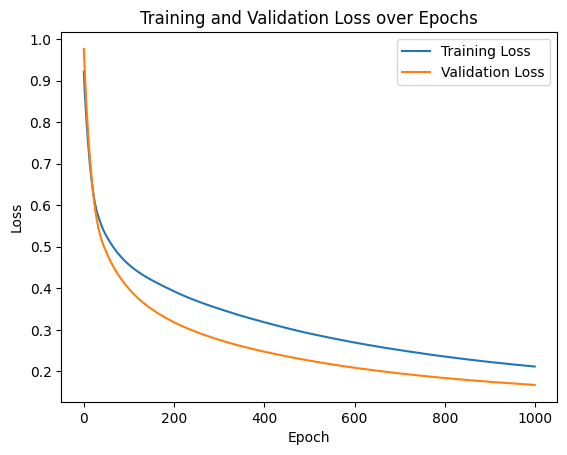

Final Accuracy: 0.975609756097561
Confusion Matrix:
[[38.03546987  3.2465018 ]
 [ 8.00873683 35.77040447]]
Epoch: 0, Training Loss: 1.0814990569239062, Validation Loss: 1.1773289784781695
Epoch: 1, Training Loss: 1.036216870583402, Validation Loss: 1.1272879084721157
Epoch: 2, Training Loss: 0.9966125899981264, Validation Loss: 1.0817483417179614
Epoch: 3, Training Loss: 0.960441124878314, Validation Loss: 1.0388857965768277
Epoch: 4, Training Loss: 0.9256871919982257, Validation Loss: 0.9977599833615239
Epoch: 5, Training Loss: 0.89282536133816, Validation Loss: 0.9588321520940103
Epoch: 6, Training Loss: 0.8620401809459726, Validation Loss: 0.9221155804948997
Epoch: 7, Training Loss: 0.8335796277042101, Validation Loss: 0.887404921839011
Epoch: 8, Training Loss: 0.8068317203368142, Validation Loss: 0.8549094942249983
Epoch: 9, Training Loss: 0.7812943138917615, Validation Loss: 0.8245520543537542
Epoch: 10, Training Loss: 0.7571886433371737, Validation Loss: 0.796106816064733
Epoch: 

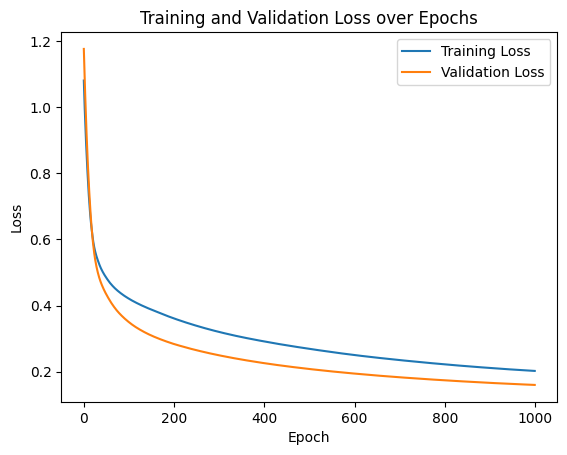

Final Accuracy: 0.975609756097561
Confusion Matrix:
[[38.30156293  2.95956418]
 [ 7.7416829  36.28077584]]
Epoch: 0, Training Loss: 1.3001330002809426, Validation Loss: 1.4507333082286813
Epoch: 1, Training Loss: 1.2258282017437394, Validation Loss: 1.3674774765777944
Epoch: 2, Training Loss: 1.161835752973827, Validation Loss: 1.2922646642762408
Epoch: 3, Training Loss: 1.1017049421989067, Validation Loss: 1.2208460888508077
Epoch: 4, Training Loss: 1.0443565786664875, Validation Loss: 1.1528184492041376
Epoch: 5, Training Loss: 0.990999271201697, Validation Loss: 1.0891217690299162
Epoch: 6, Training Loss: 0.9417637582427479, Validation Loss: 1.0290476219481184
Epoch: 7, Training Loss: 0.8959544061710086, Validation Loss: 0.9736051876348202
Epoch: 8, Training Loss: 0.8522829667549046, Validation Loss: 0.9223515850707048
Epoch: 9, Training Loss: 0.8119203361530763, Validation Loss: 0.87523070545236
Epoch: 10, Training Loss: 0.7753901490246664, Validation Loss: 0.8309297483143783
Epoch

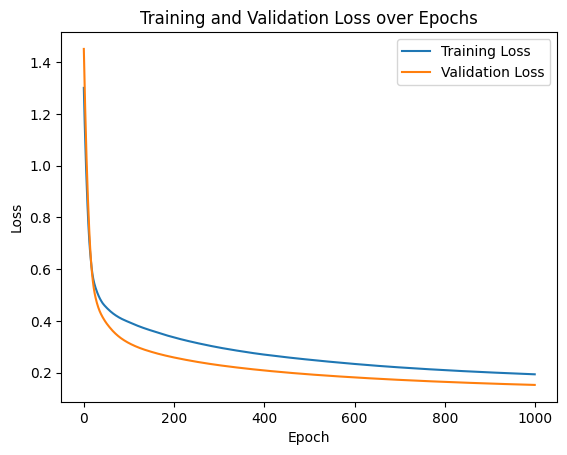

Final Accuracy: 0.975609756097561
Confusion Matrix:
[[38.50869664  2.70457483]
 [ 7.54037283 36.68567761]]
Epoch: 0, Training Loss: 1.5819197286019162, Validation Loss: 1.802206541558202
Epoch: 1, Training Loss: 1.4694329554935686, Validation Loss: 1.6740370781638083
Epoch: 2, Training Loss: 1.372485270122092, Validation Loss: 1.5582333732859854
Epoch: 3, Training Loss: 1.2800902071327207, Validation Loss: 1.4478434239331748
Epoch: 4, Training Loss: 1.1938766760487431, Validation Loss: 1.3445331890867895
Epoch: 5, Training Loss: 1.1139043025644004, Validation Loss: 1.2470767244450531
Epoch: 6, Training Loss: 1.0403886359678483, Validation Loss: 1.1578577459829043
Epoch: 7, Training Loss: 0.9703803185580282, Validation Loss: 1.0762295512326452
Epoch: 8, Training Loss: 0.9064121624495918, Validation Loss: 1.0016939894596775
Epoch: 9, Training Loss: 0.8492046433361918, Validation Loss: 0.9306453878129467
Epoch: 10, Training Loss: 0.7989786065802129, Validation Loss: 0.8655729816701264
Epo

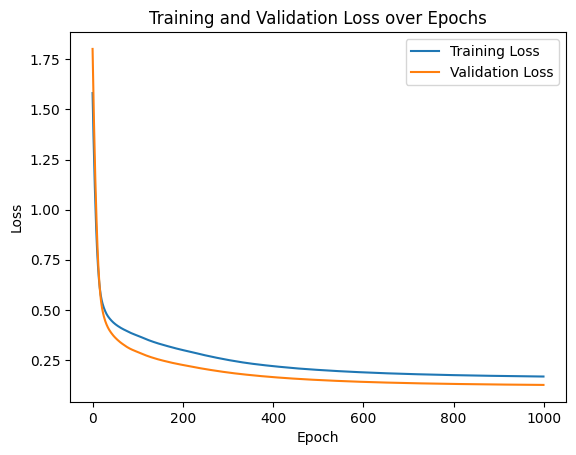

Final Accuracy: 0.975609756097561
Confusion Matrix:
[[38.61232592  2.55698745]
 [ 4.4460752  37.97509464]]
Epoch: 0, Training Loss: 0.6931592092356419, Validation Loss: 0.6931471805600078
Epoch: 1, Training Loss: 0.6931591828210342, Validation Loss: 0.6931471805601868
Epoch: 2, Training Loss: 0.693159157240238, Validation Loss: 0.693147180560472
Epoch: 3, Training Loss: 0.6931591324669288, Validation Loss: 0.6931471805608526
Epoch: 4, Training Loss: 0.6931591084756146, Validation Loss: 0.6931471805613191
Epoch: 5, Training Loss: 0.6931590852416082, Validation Loss: 0.6931471805618634
Epoch: 6, Training Loss: 0.6931590627410009, Validation Loss: 0.6931471805624763
Epoch: 7, Training Loss: 0.6931590409506405, Validation Loss: 0.6931471805631508
Epoch: 8, Training Loss: 0.6931590198481046, Validation Loss: 0.69314718056388
Epoch: 9, Training Loss: 0.6931589994116797, Validation Loss: 0.6931471805646573
Epoch: 10, Training Loss: 0.6931589796203371, Validation Loss: 0.6931471805654769
Epoch

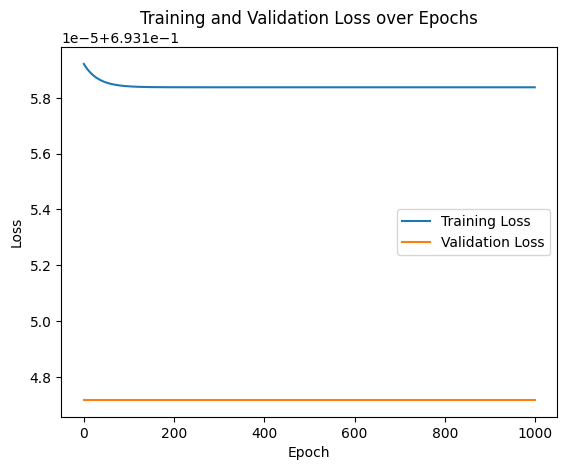

Final Accuracy: 0.5
Confusion Matrix:
[[20.49977063 20.50022937]
 [20.49977063 20.50022937]]
Epoch: 0, Training Loss: 0.6933300235475248, Validation Loss: 0.6932559416261314
Epoch: 1, Training Loss: 0.6931897237727189, Validation Loss: 0.6930604017354824
Epoch: 2, Training Loss: 0.6930532565484891, Validation Loss: 0.6928872038928452
Epoch: 3, Training Loss: 0.6929263488223267, Validation Loss: 0.6927298747986383
Epoch: 4, Training Loss: 0.6928150891595284, Validation Loss: 0.692591324942873
Epoch: 5, Training Loss: 0.6927291565672239, Validation Loss: 0.6924830193900421
Epoch: 6, Training Loss: 0.692661393717368, Validation Loss: 0.6923902016726349
Epoch: 7, Training Loss: 0.6926055855352623, Validation Loss: 0.6923103691683301
Epoch: 8, Training Loss: 0.6925526972235273, Validation Loss: 0.6922395075451223
Epoch: 9, Training Loss: 0.6925037606064764, Validation Loss: 0.6921767687808743
Epoch: 10, Training Loss: 0.6924599361841651, Validation Loss: 0.6921196775551626
Epoch: 11, Traini

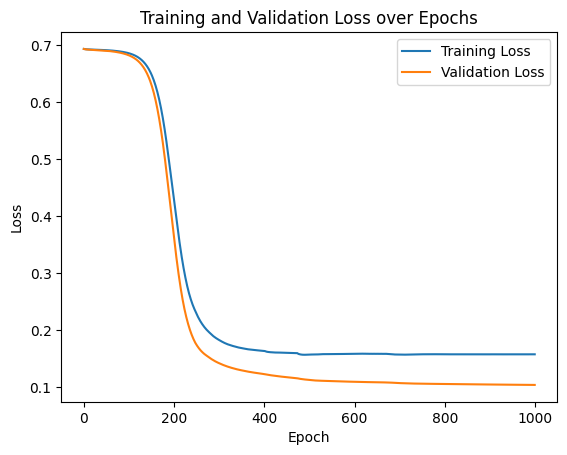

Final Accuracy: 0.975609756097561
Confusion Matrix:
[[39.21579984  1.79005224]
 [ 2.18591964 38.81444073]]
Epoch: 0, Training Loss: 0.6945819808944926, Validation Loss: 0.6942030916650241
Epoch: 1, Training Loss: 0.6935288196171807, Validation Loss: 0.692740456682598
Epoch: 2, Training Loss: 0.6924801458480374, Validation Loss: 0.6913554056792608
Epoch: 3, Training Loss: 0.6914584399882758, Validation Loss: 0.6900743270031097
Epoch: 4, Training Loss: 0.6905052861093925, Validation Loss: 0.688896487746865
Epoch: 5, Training Loss: 0.6896303920274927, Validation Loss: 0.6878003784089051
Epoch: 6, Training Loss: 0.6888446133718301, Validation Loss: 0.6868101198003319
Epoch: 7, Training Loss: 0.6881091813832347, Validation Loss: 0.6859186030730127
Epoch: 8, Training Loss: 0.6874425386732397, Validation Loss: 0.6851121616645781
Epoch: 9, Training Loss: 0.6868293683799404, Validation Loss: 0.684380337344896
Epoch: 10, Training Loss: 0.6862606421551374, Validation Loss: 0.6836895891451794
Epoc

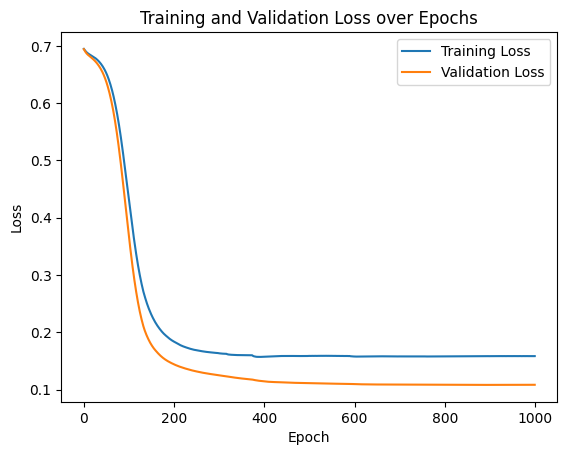

Final Accuracy: 0.975609756097561
Confusion Matrix:
[[39.20334118  1.80542307]
 [ 2.17336749 38.82940946]]
Epoch: 0, Training Loss: 0.6978200217759082, Validation Loss: 0.6968818485381714
Epoch: 1, Training Loss: 0.6937849851544681, Validation Loss: 0.6914413163218095
Epoch: 2, Training Loss: 0.6898935282680785, Validation Loss: 0.6865394696243811
Epoch: 3, Training Loss: 0.685990322992036, Validation Loss: 0.6817786916310009
Epoch: 4, Training Loss: 0.6822925217786625, Validation Loss: 0.6773492036145812
Epoch: 5, Training Loss: 0.6791336875097033, Validation Loss: 0.6733912846197324
Epoch: 6, Training Loss: 0.6763379593890418, Validation Loss: 0.6699174336804775
Epoch: 7, Training Loss: 0.6736724337325953, Validation Loss: 0.6668315347155552
Epoch: 8, Training Loss: 0.6712323872993928, Validation Loss: 0.663975113674154
Epoch: 9, Training Loss: 0.6688994710344747, Validation Loss: 0.661184377020346
Epoch: 10, Training Loss: 0.6666003299503058, Validation Loss: 0.6584775488842696
Epoc

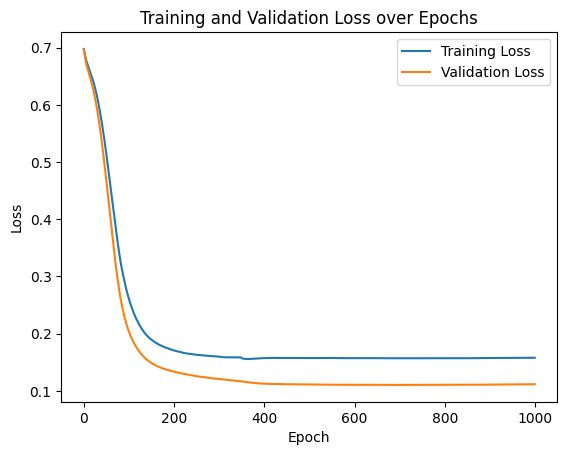

Final Accuracy: 0.975609756097561
Confusion Matrix:
[[39.19635937  1.81291703]
 [ 2.20615387 38.80377389]]
Epoch: 0, Training Loss: 0.7048846438362518, Validation Loss: 0.7040206926384358
Epoch: 1, Training Loss: 0.6930258334511313, Validation Loss: 0.689067071445443
Epoch: 2, Training Loss: 0.6818199670977658, Validation Loss: 0.6757618435537135
Epoch: 3, Training Loss: 0.6717252240152601, Validation Loss: 0.6637529751937361
Epoch: 4, Training Loss: 0.6632699581685428, Validation Loss: 0.6533204916300702
Epoch: 5, Training Loss: 0.6560168357116256, Validation Loss: 0.6445935514895894
Epoch: 6, Training Loss: 0.6498309323620012, Validation Loss: 0.6373020933692902
Epoch: 7, Training Loss: 0.6439379493147476, Validation Loss: 0.6305285873506632
Epoch: 8, Training Loss: 0.6384305035554514, Validation Loss: 0.6237314531372617
Epoch: 9, Training Loss: 0.6331071594480924, Validation Loss: 0.6170040265457356
Epoch: 10, Training Loss: 0.6279102644394338, Validation Loss: 0.6101969228171958
Ep

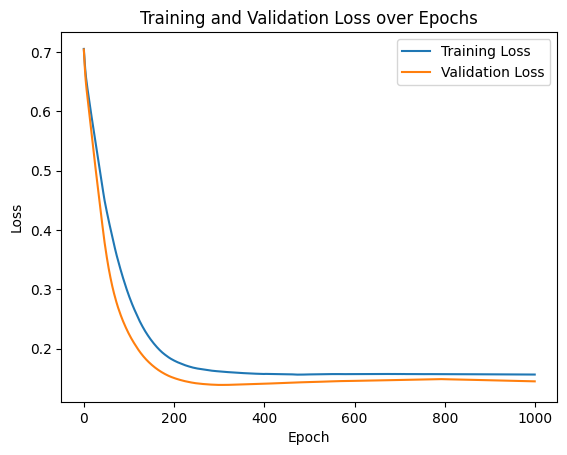

Final Accuracy: 0.975609756097561
Confusion Matrix:
[[38.96340256  2.07056481]
 [ 2.3471127  38.63544343]]
Epoch: 0, Training Loss: 0.7176071773479087, Validation Loss: 0.7192602021219647
Epoch: 1, Training Loss: 0.6876496179925984, Validation Loss: 0.6834819145284925
Epoch: 2, Training Loss: 0.6622947615169624, Validation Loss: 0.6535223849570188
Epoch: 3, Training Loss: 0.6423711609571144, Validation Loss: 0.6286181577454699
Epoch: 4, Training Loss: 0.6270879789299875, Validation Loss: 0.6097580118559739
Epoch: 5, Training Loss: 0.6148033770755303, Validation Loss: 0.5942052890692621
Epoch: 6, Training Loss: 0.6039651150428317, Validation Loss: 0.58034641649966
Epoch: 7, Training Loss: 0.5936679572322142, Validation Loss: 0.5676073963415057
Epoch: 8, Training Loss: 0.5839302460559344, Validation Loss: 0.5548651379307972
Epoch: 9, Training Loss: 0.5744791407802421, Validation Loss: 0.542743603796794
Epoch: 10, Training Loss: 0.5653830937268555, Validation Loss: 0.5311954786237363
Epoc

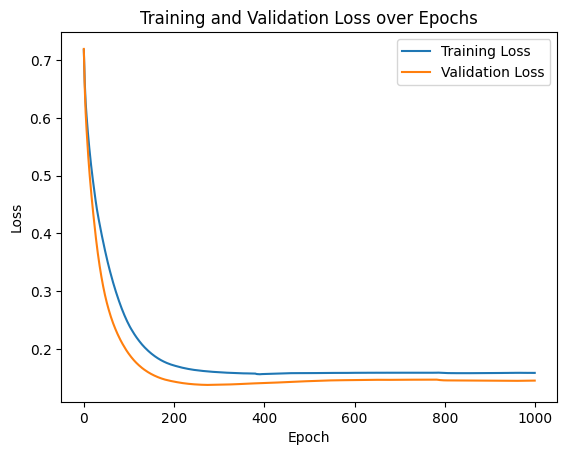

Final Accuracy: 0.975609756097561
Confusion Matrix:
[[39.02579189  1.92597978]
 [ 2.3683608  38.59728959]]
Epoch: 0, Training Loss: 0.7368625801177118, Validation Loss: 0.7449005009420133
Epoch: 1, Training Loss: 0.6732502425508706, Validation Loss: 0.6705951966552812
Epoch: 2, Training Loss: 0.629258139310985, Validation Loss: 0.6150042722060021
Epoch: 3, Training Loss: 0.6000304095756401, Validation Loss: 0.576848998909362
Epoch: 4, Training Loss: 0.5791858716699309, Validation Loss: 0.550443290517518
Epoch: 5, Training Loss: 0.5621884626116624, Validation Loss: 0.5296255984030069
Epoch: 6, Training Loss: 0.5475604567521898, Validation Loss: 0.5108778948864852
Epoch: 7, Training Loss: 0.5347084735115504, Validation Loss: 0.49426198623175316
Epoch: 8, Training Loss: 0.5229807918639663, Validation Loss: 0.47942812157793596
Epoch: 9, Training Loss: 0.5121248241845372, Validation Loss: 0.4657893052218188
Epoch: 10, Training Loss: 0.5020985175005848, Validation Loss: 0.45317982331192475
E

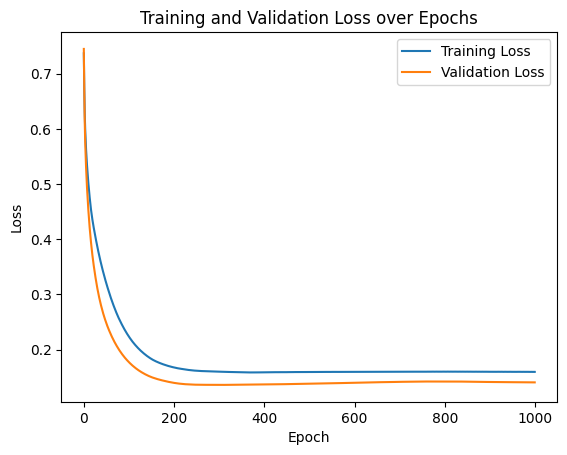

Final Accuracy: 0.975609756097561
Confusion Matrix:
[[38.94342969  2.00281847]
 [ 2.17785723 38.84590459]]
Epoch: 0, Training Loss: 0.7625581884177314, Validation Loss: 0.780361049956103
Epoch: 1, Training Loss: 0.6476007187805037, Validation Loss: 0.6443569013336277
Epoch: 2, Training Loss: 0.5864991529247721, Validation Loss: 0.5628401780186345
Epoch: 3, Training Loss: 0.5535481420226863, Validation Loss: 0.5176637513814778
Epoch: 4, Training Loss: 0.5296508556903503, Validation Loss: 0.4890158808468516
Epoch: 5, Training Loss: 0.5111511787578599, Validation Loss: 0.4658824077418602
Epoch: 6, Training Loss: 0.4950099299047913, Validation Loss: 0.4455974585179764
Epoch: 7, Training Loss: 0.4809246180936203, Validation Loss: 0.4284099896484932
Epoch: 8, Training Loss: 0.4691452857553476, Validation Loss: 0.41340792268898396
Epoch: 9, Training Loss: 0.4586728901599876, Validation Loss: 0.40002842139313816
Epoch: 10, Training Loss: 0.44941009995552567, Validation Loss: 0.3880759457197797

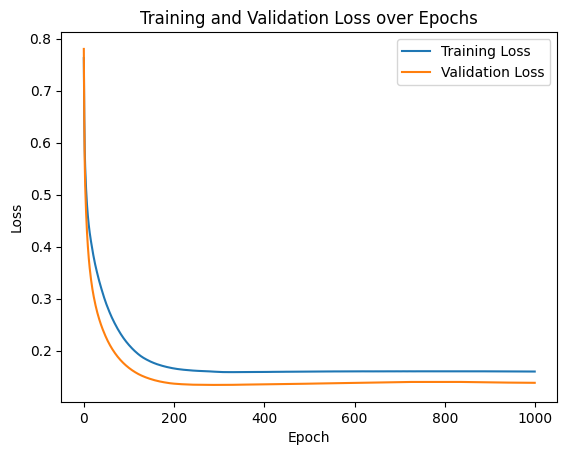

Final Accuracy: 0.975609756097561
Confusion Matrix:
[[38.96291562  1.97798723]
 [ 2.17689601 38.85321883]]
Epoch: 0, Training Loss: 0.7932842129674924, Validation Loss: 0.8217736348010127
Epoch: 1, Training Loss: 0.6158599920913479, Validation Loss: 0.6050931779918548
Epoch: 2, Training Loss: 0.5462435321671889, Validation Loss: 0.5104488048434246
Epoch: 3, Training Loss: 0.5108971101250636, Validation Loss: 0.4649719501922276
Epoch: 4, Training Loss: 0.4870006443305287, Validation Loss: 0.43594691660205864
Epoch: 5, Training Loss: 0.4676345854621771, Validation Loss: 0.41237435281599577
Epoch: 6, Training Loss: 0.45270012195979886, Validation Loss: 0.3923431310244852
Epoch: 7, Training Loss: 0.4406587384449932, Validation Loss: 0.37587989925443394
Epoch: 8, Training Loss: 0.4306549090720872, Validation Loss: 0.362358966807071
Epoch: 9, Training Loss: 0.42181412094325815, Validation Loss: 0.35056529308143347
Epoch: 10, Training Loss: 0.41399189646790013, Validation Loss: 0.340254278784

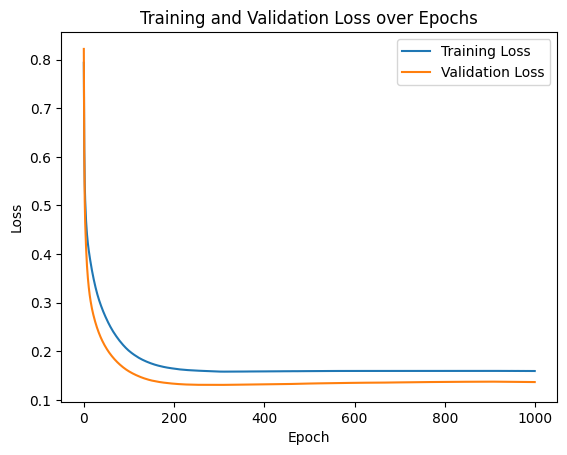

Final Accuracy: 0.975609756097561
Confusion Matrix:
[[38.97215836  1.94636026]
 [ 2.17576213 38.87973857]]
Epoch: 0, Training Loss: 0.8307363654434977, Validation Loss: 0.8716693089564063
Epoch: 1, Training Loss: 0.5856244663431373, Validation Loss: 0.5669154830205916
Epoch: 2, Training Loss: 0.5151080819891903, Validation Loss: 0.4685121380800193
Epoch: 3, Training Loss: 0.4781826631072696, Validation Loss: 0.42390271040897587
Epoch: 4, Training Loss: 0.4555019250529953, Validation Loss: 0.3952108453709476
Epoch: 5, Training Loss: 0.438829247206118, Validation Loss: 0.3729509613669813
Epoch: 6, Training Loss: 0.42494212487465677, Validation Loss: 0.35449646022627423
Epoch: 7, Training Loss: 0.4136864774988816, Validation Loss: 0.3388826457448602
Epoch: 8, Training Loss: 0.40462893084274243, Validation Loss: 0.326306855512093
Epoch: 9, Training Loss: 0.3968525857524983, Validation Loss: 0.315837657742891
Epoch: 10, Training Loss: 0.3889087061069427, Validation Loss: 0.3068715780330884


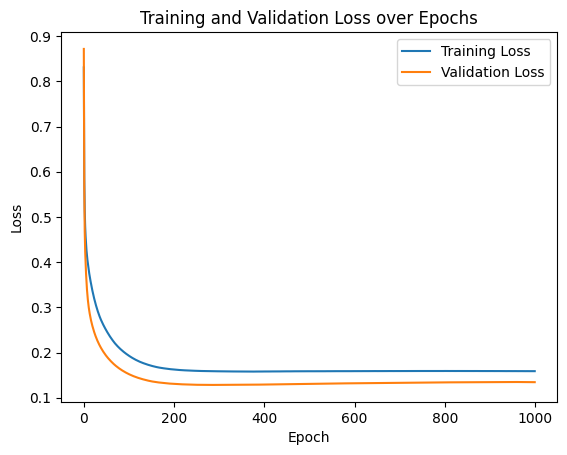

Final Accuracy: 0.975609756097561
Confusion Matrix:
[[38.99966076  1.91216933]
 [ 2.18710438 38.89086609]]
Epoch: 0, Training Loss: 0.8744832174870635, Validation Loss: 0.9265095868080123
Epoch: 1, Training Loss: 0.5643733269529844, Validation Loss: 0.5344926809758723
Epoch: 2, Training Loss: 0.4905425238821649, Validation Loss: 0.4374707367006822
Epoch: 3, Training Loss: 0.45630978052877247, Validation Loss: 0.3930633015964492
Epoch: 4, Training Loss: 0.4330791627427711, Validation Loss: 0.36430248844613355
Epoch: 5, Training Loss: 0.41669644387347476, Validation Loss: 0.3433765809799623
Epoch: 6, Training Loss: 0.4034204919512956, Validation Loss: 0.3264103195339798
Epoch: 7, Training Loss: 0.391877946182178, Validation Loss: 0.31226459411541035
Epoch: 8, Training Loss: 0.38167142829087897, Validation Loss: 0.30066580064941567
Epoch: 9, Training Loss: 0.3728469447511831, Validation Loss: 0.29113873072612567
Epoch: 10, Training Loss: 0.3649943983923883, Validation Loss: 0.282805783397

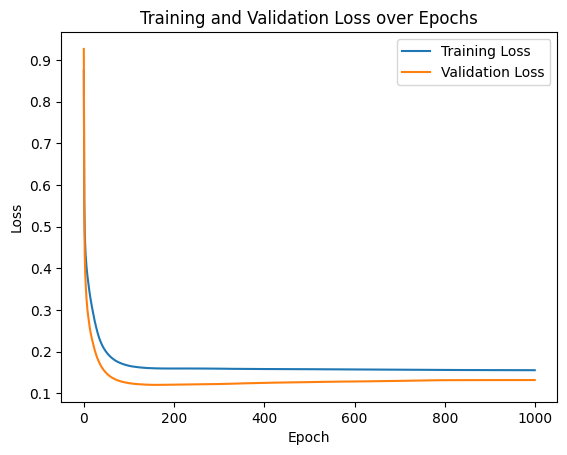

Final Accuracy: 0.975609756097561
Confusion Matrix:
[[38.99587888  2.00843278]
 [ 2.30049323 38.76030285]]
Epoch: 0, Training Loss: 0.6932659882249406, Validation Loss: 0.6931471826250095
Epoch: 1, Training Loss: 0.6932622684519122, Validation Loss: 0.6931471866906695
Epoch: 2, Training Loss: 0.6932595804002758, Validation Loss: 0.6931471909750268
Epoch: 3, Training Loss: 0.6932576376302844, Validation Loss: 0.6931471947756904
Epoch: 4, Training Loss: 0.6932562333607566, Validation Loss: 0.6931471978911264
Epoch: 5, Training Loss: 0.6932552182525646, Validation Loss: 0.6931472003357443
Epoch: 6, Training Loss: 0.6932544844184464, Validation Loss: 0.6931472022036661
Epoch: 7, Training Loss: 0.6932539538998499, Validation Loss: 0.6931472036066998
Epoch: 8, Training Loss: 0.6932535703553816, Validation Loss: 0.6931472046485578
Epoch: 9, Training Loss: 0.6932532930618103, Validation Loss: 0.6931472054161831
Epoch: 10, Training Loss: 0.6932530925821295, Validation Loss: 0.6931472059786873
E

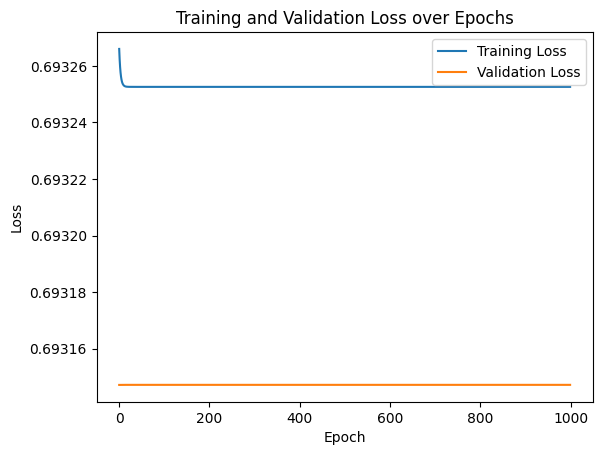

Final Accuracy: 0.5
Confusion Matrix:
[[20.49524358 20.50475642]
 [20.49524358 20.50475642]]
Epoch: 0, Training Loss: 0.6926661464861935, Validation Loss: 0.6921723145654637
Epoch: 1, Training Loss: 0.6923197424915967, Validation Loss: 0.6917232919106413
Epoch: 2, Training Loss: 0.6920520076321268, Validation Loss: 0.691305006446754
Epoch: 3, Training Loss: 0.691734727946282, Validation Loss: 0.690815395036547
Epoch: 4, Training Loss: 0.6913427099636701, Validation Loss: 0.6902040443349176
Epoch: 5, Training Loss: 0.6908325446184566, Validation Loss: 0.6894214683793212
Epoch: 6, Training Loss: 0.6901666084449773, Validation Loss: 0.6884067444719065
Epoch: 7, Training Loss: 0.6892900237000302, Validation Loss: 0.687065616001413
Epoch: 8, Training Loss: 0.6880916106137641, Validation Loss: 0.6852461780167121
Epoch: 9, Training Loss: 0.6864120834051873, Validation Loss: 0.6827210239489292
Epoch: 10, Training Loss: 0.6839463901630862, Validation Loss: 0.6791185325277649
Epoch: 11, Training

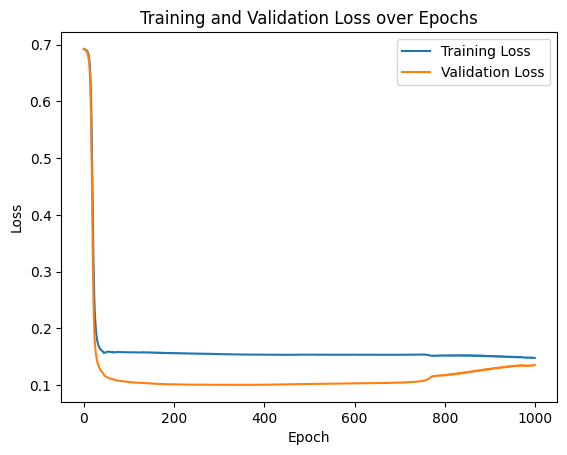

Final Accuracy: 0.9634146341463414
Confusion Matrix:
[[39.42432969  1.57463628]
 [ 2.6930412  38.30912911]]
Epoch: 0, Training Loss: 0.6875165887402944, Validation Loss: 0.6844347623514224
Epoch: 1, Training Loss: 0.6825811754275937, Validation Loss: 0.6779089303250412
Epoch: 2, Training Loss: 0.6770599688780248, Validation Loss: 0.6699241708305075
Epoch: 3, Training Loss: 0.6688340463350476, Validation Loss: 0.6582712211308215
Epoch: 4, Training Loss: 0.6561434029539487, Validation Loss: 0.6405007944653665
Epoch: 5, Training Loss: 0.6363847366598206, Validation Loss: 0.6135778289383155
Epoch: 6, Training Loss: 0.6070952399590935, Validation Loss: 0.5742763000022935
Epoch: 7, Training Loss: 0.5661183287097379, Validation Loss: 0.5203920494473643
Epoch: 8, Training Loss: 0.5126987370081875, Validation Loss: 0.4536117815114381
Epoch: 9, Training Loss: 0.4518599764486456, Validation Loss: 0.3818698428800954
Epoch: 10, Training Loss: 0.391037321980166, Validation Loss: 0.3158245774035382
E

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18680\2839085376.py:12: RuntimeWarning: divide by zero encountered in log
  return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18680\2839085376.py:12: RuntimeWarning: invalid value encountered in multiply
  return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))


Epoch: 805, Training Loss: nan, Validation Loss: nan
Epoch: 806, Training Loss: nan, Validation Loss: nan
Epoch: 807, Training Loss: nan, Validation Loss: nan
Epoch: 808, Training Loss: nan, Validation Loss: nan
Epoch: 809, Training Loss: nan, Validation Loss: nan
Epoch: 810, Training Loss: nan, Validation Loss: nan
Epoch: 811, Training Loss: nan, Validation Loss: nan
Epoch: 812, Training Loss: nan, Validation Loss: nan
Epoch: 813, Training Loss: nan, Validation Loss: nan
Epoch: 814, Training Loss: nan, Validation Loss: nan
Epoch: 815, Training Loss: nan, Validation Loss: nan
Epoch: 816, Training Loss: nan, Validation Loss: nan
Epoch: 817, Training Loss: nan, Validation Loss: nan
Epoch: 818, Training Loss: nan, Validation Loss: nan
Epoch: 819, Training Loss: nan, Validation Loss: nan
Epoch: 820, Training Loss: nan, Validation Loss: nan
Epoch: 821, Training Loss: nan, Validation Loss: nan
Epoch: 822, Training Loss: nan, Validation Loss: nan
Epoch: 823, Training Loss: nan, Validation Los

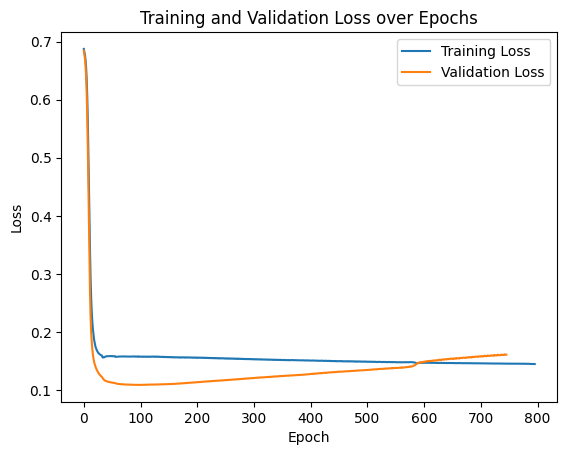

Final Accuracy: 0.9512195121951219
Confusion Matrix:
[[39.88092606  1.11866665]
 [ 3.29034991 37.72473433]]
Epoch: 0, Training Loss: 0.6714757437379881, Validation Loss: 0.6617211795280351
Epoch: 1, Training Loss: 0.6509174806896189, Validation Loss: 0.634925824261435
Epoch: 2, Training Loss: 0.6239533300483784, Validation Loss: 0.5988890120121889
Epoch: 3, Training Loss: 0.5839382504240658, Validation Loss: 0.5477462586214326
Epoch: 4, Training Loss: 0.5331112667520854, Validation Loss: 0.483190943056682
Epoch: 5, Training Loss: 0.4749892855482232, Validation Loss: 0.41068441879038997
Epoch: 6, Training Loss: 0.4130645508780658, Validation Loss: 0.34041009011876344
Epoch: 7, Training Loss: 0.3530792385010516, Validation Loss: 0.28077614300630344
Epoch: 8, Training Loss: 0.30552515545611203, Validation Loss: 0.2385445137911655
Epoch: 9, Training Loss: 0.26995941181912175, Validation Loss: 0.21002483819911588
Epoch: 10, Training Loss: 0.2435650199949331, Validation Loss: 0.1906804482401

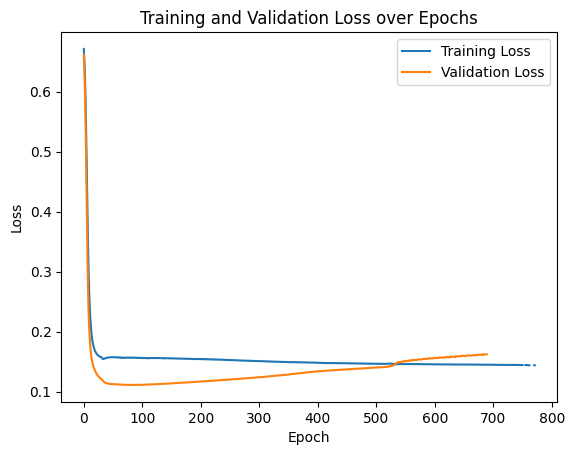

Final Accuracy: 0.9512195121951219
Confusion Matrix:
[[39.86783277  1.13062968]
 [ 3.49846169 37.54361605]]
Epoch: 0, Training Loss: 0.6374393747328753, Validation Loss: 0.6183423657702093
Epoch: 1, Training Loss: 0.5920921539995149, Validation Loss: 0.5610610892511793
Epoch: 2, Training Loss: 0.5448963768054745, Validation Loss: 0.4976091924423482
Epoch: 3, Training Loss: 0.48914676044068195, Validation Loss: 0.4266085882029309
Epoch: 4, Training Loss: 0.43140508469388117, Validation Loss: 0.35536109880926553
Epoch: 5, Training Loss: 0.3777569539190541, Validation Loss: 0.29723499567274053
Epoch: 6, Training Loss: 0.32564825834006705, Validation Loss: 0.25461775967695494
Epoch: 7, Training Loss: 0.28517888586569634, Validation Loss: 0.224056136004417
Epoch: 8, Training Loss: 0.2546177555290356, Validation Loss: 0.20132743293089223
Epoch: 9, Training Loss: 0.23070469072519273, Validation Loss: 0.1842190352047293
Epoch: 10, Training Loss: 0.21310123787196986, Validation Loss: 0.17184204

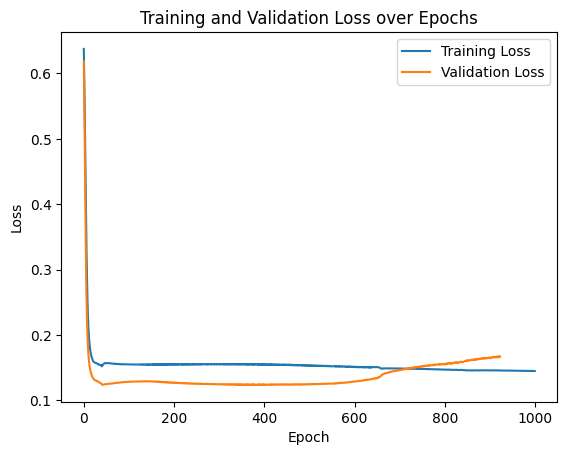

Final Accuracy: 0.9512195121951219
Confusion Matrix:
[[39.80271115  1.19784975]
 [ 3.00633419 37.99727978]]
Epoch: 0, Training Loss: 0.5845973832310241, Validation Loss: 0.5468047833188896
Epoch: 1, Training Loss: 0.5136900723484412, Validation Loss: 0.4580294446105835
Epoch: 2, Training Loss: 0.46012329909705796, Validation Loss: 0.38921844287920154
Epoch: 3, Training Loss: 0.42165003141151275, Validation Loss: 0.33795220418031857
Epoch: 4, Training Loss: 0.3884948562085742, Validation Loss: 0.3014578318235959
Epoch: 5, Training Loss: 0.3571820041023459, Validation Loss: 0.27543834127928446
Epoch: 6, Training Loss: 0.3310095124642513, Validation Loss: 0.25510835262860293
Epoch: 7, Training Loss: 0.3088063600512005, Validation Loss: 0.23862481663817117
Epoch: 8, Training Loss: 0.28953368741734525, Validation Loss: 0.22512577638996595
Epoch: 9, Training Loss: 0.27237902148775295, Validation Loss: 0.21412794892086373
Epoch: 10, Training Loss: 0.2581366783696849, Validation Loss: 0.205308

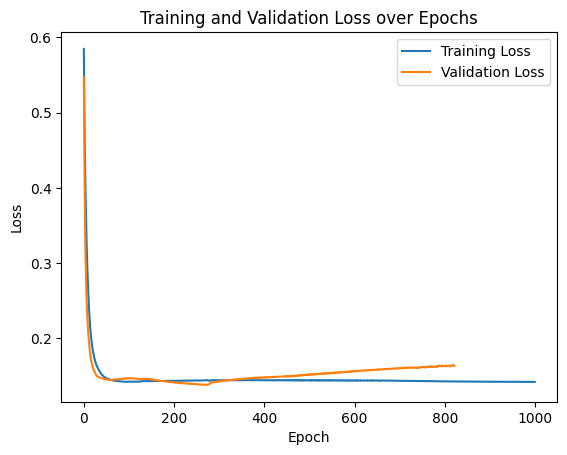

Final Accuracy: 0.9512195121951219
Confusion Matrix:
[[39.89942332  1.10139137]
 [ 3.2771471  37.60187151]]
Epoch: 0, Training Loss: 0.5261496717699959, Validation Loss: 0.4731671950563577
Epoch: 1, Training Loss: 0.4520931113512297, Validation Loss: 0.3810107340543633
Epoch: 2, Training Loss: 0.41185335880374496, Validation Loss: 0.328075431969927
Epoch: 3, Training Loss: 0.3781359310685583, Validation Loss: 0.2927317753123022
Epoch: 4, Training Loss: 0.348614794171282, Validation Loss: 0.2675955216372904
Epoch: 5, Training Loss: 0.32296409076937355, Validation Loss: 0.24791813277975688
Epoch: 6, Training Loss: 0.30066368798284, Validation Loss: 0.23182366102217053
Epoch: 7, Training Loss: 0.28156335858000975, Validation Loss: 0.21940543799943144
Epoch: 8, Training Loss: 0.2663323011567131, Validation Loss: 0.20950002458407324
Epoch: 9, Training Loss: 0.2530046299420186, Validation Loss: 0.20057256815008473
Epoch: 10, Training Loss: 0.24055844118203243, Validation Loss: 0.192904379620

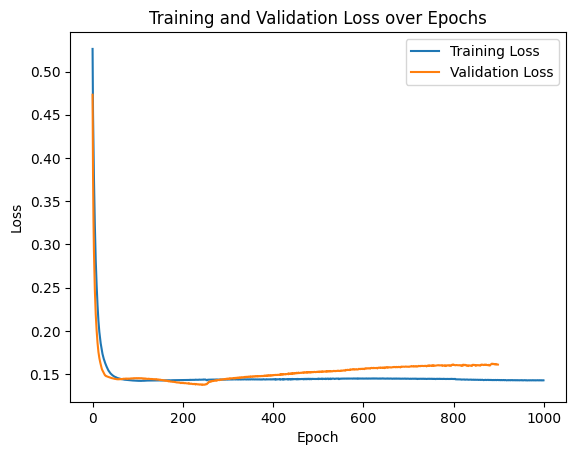

Final Accuracy: 0.9512195121951219
Confusion Matrix:
[[39.88080421  1.11873235]
 [ 3.21308628 37.6651351 ]]
Epoch: 0, Training Loss: 0.4743096216103073, Validation Loss: 0.41103563582442076
Epoch: 1, Training Loss: 0.4104291512110212, Validation Loss: 0.3292204203183957
Epoch: 2, Training Loss: 0.3735463634759891, Validation Loss: 0.29092335037587214
Epoch: 3, Training Loss: 0.3437946436482375, Validation Loss: 0.26471360182401865
Epoch: 4, Training Loss: 0.31922671219929816, Validation Loss: 0.24474646969934485
Epoch: 5, Training Loss: 0.2962896486091366, Validation Loss: 0.22863966099960203
Epoch: 6, Training Loss: 0.27868029035179015, Validation Loss: 0.21569812391186238
Epoch: 7, Training Loss: 0.2636998859318151, Validation Loss: 0.20531899712631618
Epoch: 8, Training Loss: 0.2504974412092947, Validation Loss: 0.196264131877724
Epoch: 9, Training Loss: 0.2383221832751266, Validation Loss: 0.1885424886064069
Epoch: 10, Training Loss: 0.22780379391019204, Validation Loss: 0.18188607

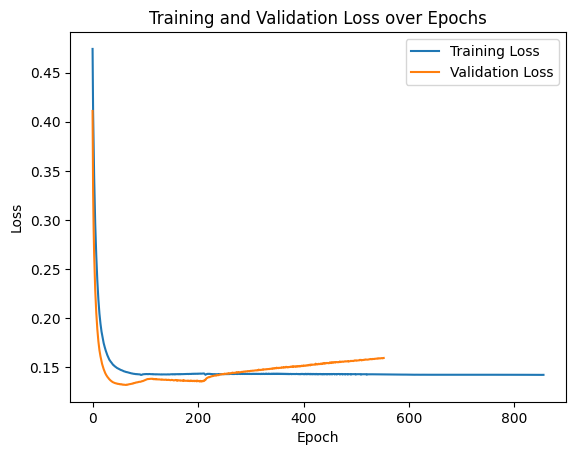

Final Accuracy: 0.9634146341463414
Confusion Matrix:
[[39.90637043  1.10092589]
 [ 3.38862139 37.47118849]]
Epoch: 0, Training Loss: 0.4353406286597348, Validation Loss: 0.35497019514833233
Epoch: 1, Training Loss: 0.37789353195678277, Validation Loss: 0.2903799556445859
Epoch: 2, Training Loss: 0.3285891240803994, Validation Loss: 0.25010022705204094
Epoch: 3, Training Loss: 0.2859982062900244, Validation Loss: 0.21912610882189143
Epoch: 4, Training Loss: 0.25494588763505954, Validation Loss: 0.19630894581590905
Epoch: 5, Training Loss: 0.23165695853339938, Validation Loss: 0.17846800186407608
Epoch: 6, Training Loss: 0.21320109029105883, Validation Loss: 0.1654928037449472
Epoch: 7, Training Loss: 0.19923738166419902, Validation Loss: 0.15585347456627924
Epoch: 8, Training Loss: 0.18892515798894657, Validation Loss: 0.14863949779879876
Epoch: 9, Training Loss: 0.18099206773588117, Validation Loss: 0.1431119014242085
Epoch: 10, Training Loss: 0.17507889895284037, Validation Loss: 0.13

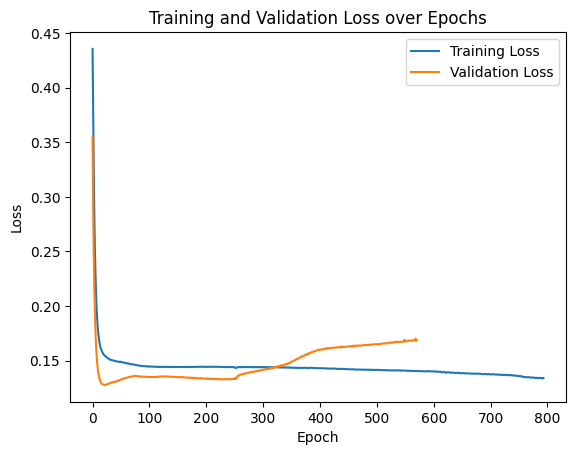

Final Accuracy: 0.9512195121951219
Confusion Matrix:
[[40.00813884  0.988317  ]
 [ 3.15107921 37.50824212]]
Epoch: 0, Training Loss: 0.39951753910334875, Validation Loss: 0.3109824971825988
Epoch: 1, Training Loss: 0.3322389560498218, Validation Loss: 0.2527358534461126
Epoch: 2, Training Loss: 0.28133515321739616, Validation Loss: 0.21605896922410509
Epoch: 3, Training Loss: 0.2489556384919294, Validation Loss: 0.19040050363563857
Epoch: 4, Training Loss: 0.223532258295852, Validation Loss: 0.1725506292103987
Epoch: 5, Training Loss: 0.20477788934329175, Validation Loss: 0.15975687862851512
Epoch: 6, Training Loss: 0.1917812373051359, Validation Loss: 0.15086578081913204
Epoch: 7, Training Loss: 0.18197586380729122, Validation Loss: 0.14419714544090118
Epoch: 8, Training Loss: 0.17488135877060712, Validation Loss: 0.13922432538595414
Epoch: 9, Training Loss: 0.1694990400576062, Validation Loss: 0.13557625950549262
Epoch: 10, Training Loss: 0.16578616040425365, Validation Loss: 0.13298

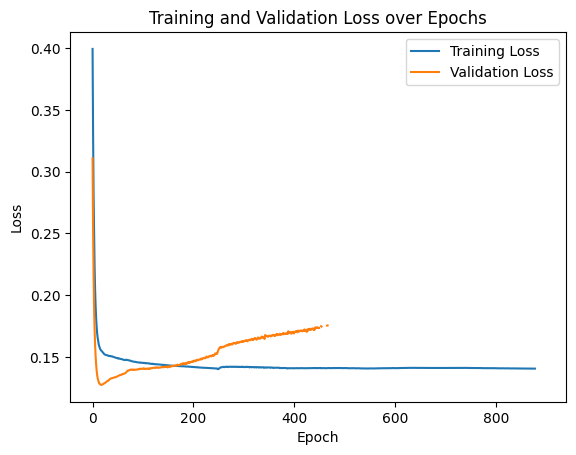

Final Accuracy: 0.9512195121951219
Confusion Matrix:
[[39.95174479  1.0467963 ]
 [ 3.68900747 37.21322049]]
Epoch: 0, Training Loss: 0.36806799689274694, Validation Loss: 0.28175537935281164
Epoch: 1, Training Loss: 0.2977289470519766, Validation Loss: 0.2247115440476469
Epoch: 2, Training Loss: 0.247389662293362, Validation Loss: 0.18844196065786553
Epoch: 3, Training Loss: 0.21743318160389816, Validation Loss: 0.16641804339969662
Epoch: 4, Training Loss: 0.19755520277721025, Validation Loss: 0.15252727048911266
Epoch: 5, Training Loss: 0.18442494364435552, Validation Loss: 0.14360185553090474
Epoch: 6, Training Loss: 0.17579217027807917, Validation Loss: 0.13747073002615537
Epoch: 7, Training Loss: 0.16959467109786205, Validation Loss: 0.13328784762839976
Epoch: 8, Training Loss: 0.16511139235535993, Validation Loss: 0.13043388311361045
Epoch: 9, Training Loss: 0.16217847516496045, Validation Loss: 0.1285143389986904
Epoch: 10, Training Loss: 0.160039907638124, Validation Loss: 0.127

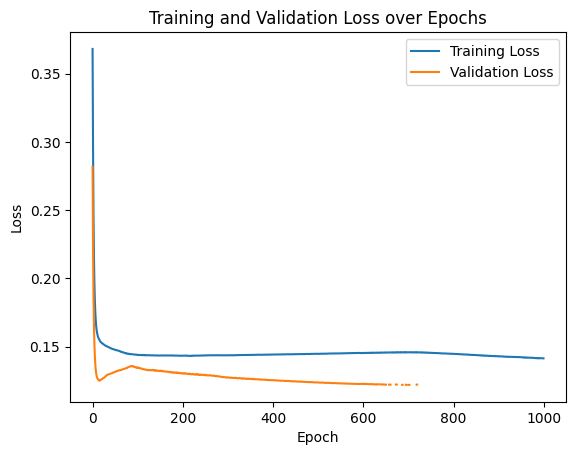

Final Accuracy: 0.975609756097561
Confusion Matrix:
[[39.6354384   1.34239255]
 [ 2.02588709 38.95788733]]


In [14]:
# Define possible values for learning rate and weight initialization
learning_rates = [0.00001, 0.0001, 0.001, 0.01, 0.1]
initialization_std_devs = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]

# Store results
results = []

# Loop over different learning rates and initializations
for lr in learning_rates:
    for std_dev in initialization_std_devs:
        # Initialize weights and biases
        np.random.seed(42)
        weights_0 = np.random.randn(input_size, hidden_size) * std_dev
        bias_0 = np.zeros((1, hidden_size))

        weights_1 = np.random.randn(hidden_size, hidden_size) * std_dev
        bias_1 = np.zeros((1, hidden_size))

        weights_2 = np.random.randn(hidden_size, output_size) * std_dev
        bias_2 = np.zeros((1, output_size))

        # Set the learning rate
        learning_rate = lr

        # Reset training and validation losses
        training_losses = []
        validation_losses = []

        for epoch in range(epochs):
            for i in range(0, len(train_X), batch_size):
                # Mini-batch
                X_batch = train_X[i:i+batch_size]
                y_batch = one_hot_train_y[i:i+batch_size]

                # Forward pass
                layer_0 = X_batch
                layer_1 = relu(np.dot(layer_0, weights_0) + bias_0)
                layer_2 = relu(np.dot(layer_1, weights_1) + bias_1)
                output = sigmoid(np.dot(layer_2, weights_2) + bias_2)

                # Calculate loss
                loss = binary_cross_entropy_loss(y_batch, output)

                # Backward pass
                d_output = output - y_batch
                d_layer_2 = np.dot(d_output, weights_2.T) * (layer_2 > 0)
                d_layer_1 = np.dot(d_layer_2, weights_1.T) * (layer_1 > 0)

                # Update weights and biases
                weights_2 -= learning_rate * np.dot(layer_2.T, d_output) / batch_size
                bias_2 -= learning_rate * np.sum(d_output, axis=0, keepdims=True) / batch_size

                weights_1 -= learning_rate * np.dot(layer_1.T, d_layer_2) / batch_size
                bias_1 -= learning_rate * np.sum(d_layer_2, axis=0, keepdims=True) / batch_size

                weights_0 -= learning_rate * np.dot(layer_0.T, d_layer_1) / batch_size
                bias_0 -= learning_rate * np.sum(d_layer_1, axis=0, keepdims=True) / batch_size

            # Calculate validation loss
            layer_1_val = relu(np.dot(validate_X, weights_0) + bias_0)
            layer_2_val = relu(np.dot(layer_1_val, weights_1) + bias_1)
            output_val = sigmoid(np.dot(layer_2_val, weights_2) + bias_2)
            val_loss = binary_cross_entropy_loss(one_hot_validate_y, output_val)

            # Print loss and check for early stopping
            print(f"Epoch: {epoch}, Training Loss: {loss}, Validation Loss: {val_loss}")

            # Store losses for plotting
            training_losses.append(loss)
            validation_losses.append(val_loss)

           
        # Plot the loss over epochs
        plt.plot(training_losses, label='Training Loss')
        plt.plot(validation_losses, label='Validation Loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.title('Training and Validation Loss over Epochs')
        plt.legend()
        plt.show()

        # Final accuracy and confusion matrix on the validation set
        predicted_labels = np.argmax(output_val, axis=1)
        accuracy = np.mean(predicted_labels == validate_y.flatten())
        results.append((lr, std_dev, accuracy))
        confusion_matrix = np.dot(np.transpose(one_hot_validate_y), output_val)
        print(f"Final Accuracy: {accuracy}")
        print("Confusion Matrix:")
        print(confusion_matrix)


->To create an accuracy matrix from the results list, you initialize the accuracy_matrix with zeros and set its shape based on the number of learning rates and standard deviations tested. Then, loop through each tuple in the results list, find the appropriate indices for the learning rate and standard deviation in their respective lists, and assign the accuracy value to the corresponding cell in the accuracy matrix. This approach helps organize the data and provides a visual representation of the model's performance across different hyperparameters.
->1. Initialize a new figure for the plot with a specified size using `plt.figure`.
2. Use `plt.imshow` to display the `accuracy_matrix` as a heatmap. The colormap `viridis` can be used, and `interpolation='nearest'` ensures that each cell in the heatmap corresponds to a discrete value without blending.
3. Add a color bar to the side of the heatmap using `plt.colorbar`, which indicates how the colors map to accuracy values.
4. Set labels for the x-axis (Standard Deviation), y-axis (Learning Rate), and a title for the heatmap using `plt.xlabel`, `plt.ylabel`, and `plt.title`, respectively.
5. Set the ticks on the x-axis and y-axis to correspond to the different values of standard deviations and learning rates, respectively, using `plt.xticks` and `plt.yticks`.

The heatmap shows how learning rates and weight initialization standard deviations affect validation accuracy. The best combination is at a learning rate of 0.001 and standard deviation of around 0.8. Extreme values of learning rate tend to be less effective, and models with very small weights tend to perform worse. The heatmap provides a useful tool for selecting optimal hyperparameters and optimizing neural network performance. However, results are specific to the model architecture, dataset, and training regimen used.

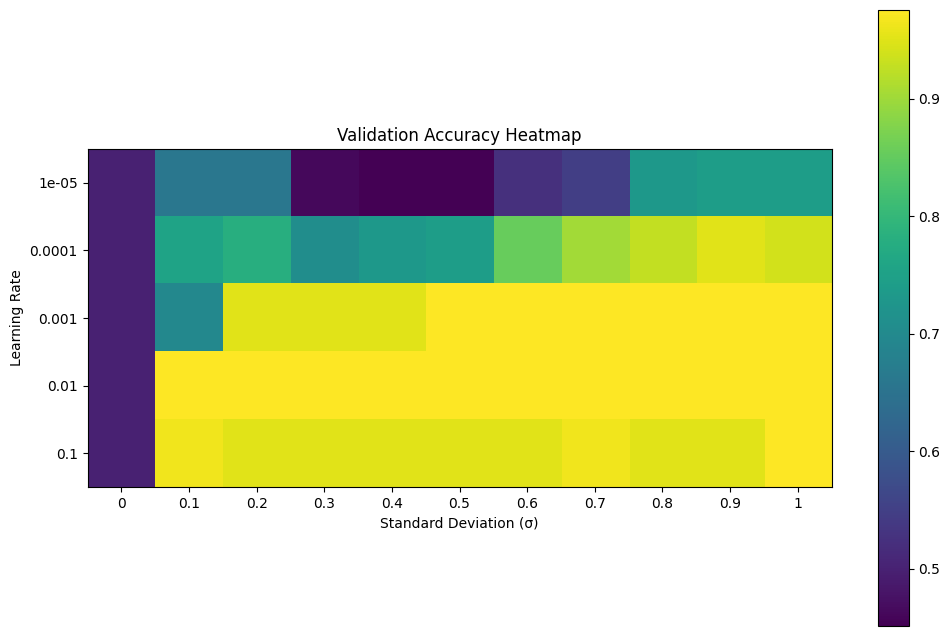

In [15]:

# First, convert results into a structured matrix
accuracy_matrix = np.zeros((len(learning_rates), len(initialization_std_devs)))

for lr, std_dev, accuracy in results:
    lr_index = learning_rates.index(lr)
    std_dev_index = initialization_std_devs.index(std_dev)
    accuracy_matrix[lr_index, std_dev_index] = accuracy

# Now plot the heatmap
plt.figure(figsize=(12, 8))
heatmap = plt.imshow(accuracy_matrix, cmap='viridis', interpolation='nearest')

# Add color bar
plt.colorbar(heatmap)

# Add labels and titles
plt.xlabel('Standard Deviation (σ)')
plt.ylabel('Learning Rate')
plt.title('Validation Accuracy Heatmap')

# Set ticks
plt.xticks(np.arange(len(initialization_std_devs)), initialization_std_devs)
plt.yticks(np.arange(len(learning_rates)), learning_rates)

plt.show()
